# AVANCE 1

In [1]:
#Importación de librerías. 
import pandas as pd

In [2]:
# Lee el archivo data_latinoamerica.csv
df = pd.read_csv("C:/HENRYPYTHON/data_latinoamerica.csv")
# Mostrar las primeras filas para verificar
df.head(6)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
5,AR,2020-01-06,AR,Argentina,9.0,0.0,41.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


In [3]:
#Cambio de tipo de dato de la columna de fecha
df["date"] = pd.to_datetime(df["date"])

In [4]:
#Corrobar cambio de tipo de dato
df["date"].dtype

dtype('<M8[ns]')

In [5]:
#Comprobar que el dataset cargado tiene la cantidad de registros y columnas especificadas. 
print(df.shape)

(12216057, 50)


In [6]:
# Seleccionar los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.
paises_expansion = ["CO", "AR", "CL", "MX", "PE", "BR"]

df_paises_filtrados = df[df["location_key"].isin(paises_expansion)]

#Comprobar que filtro por los paises seleccionados: 
print(df_paises_filtrados["country_name"].unique())

['Argentina' 'Brazil' 'Chile' 'Colombia' 'Mexico' 'Peru']


In [7]:
#Comprobar que se haya modificado la cantidad de registros. 

print(df_paises_filtrados.shape)

(5946, 50)


In [8]:
#Filtrar los datos en fechas mayores a 2021-01-01.

df_final = df_paises_filtrados[df_paises_filtrados["date"] > "2021-01-01"]

df_final["date"].dtype


dtype('<M8[ns]')

In [9]:
# verificacion: 
print("Fecha mínima:", df_final["date"].min()) # dice cual es la fecha más antigua
print("Primer fila ordenada:")
print(df_final.sort_values("date").head(1)) #imprime la primer fila que aparece con la fecha más chica 
print(df_final.shape)

Fecha mínima: 2021-01-02 00:00:00
Primer fila ordenada:
    location_key       date country_code country_name  new_confirmed  \
367           AR 2021-01-02           AR    Argentina         7767.0   

     new_deceased  cumulative_confirmed  cumulative_deceased  \
367         166.0             1670634.0              46688.0   

     cumulative_vaccine_doses_administered  population  ...  \
367                                20334.0  44938712.0  ...   

     population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367               15057273.0         2690269.0           55032.0   

     life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
367            76.52                    147.086                       79.483   

     pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
367                      26.6                        15.8            NaN   

     cumulative_recovered  
367                   NaN  

[1 rows x 50 columns]
(3744, 50)


In [10]:
#Información general del nuevo df: 
print(df_final.shape)
df_final.info()

(3744, 50)
<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3744 non-null   object        
 1   date                                   3744 non-null   datetime64[ns]
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3723 non-null   float64       
 5   new_deceased                           3723 non-null   float64       
 6   cumulative_confirmed                   3723 non-null   float64       
 7   cumulative_deceased                    3723 non-null   float64       
 8   cumulative_vaccine_doses_administered  3160 non-null   float64       
 9   population                             3744 non-nul

In [11]:
# Función para calcular nulos y % de nuelos
def diagnostico_nulos(df_final, nombre=""):
    # se genera un nuevo DataFrame resumenulos con dos columnas: Valores nulos (conteo absoluto) y % de nulos 
    resumenulos = pd.DataFrame({
        "Valores nulos": df_final.isnull().sum(),
        "% de nulos": 100 * df_final.isnull().mean()
    })

    # Filtrar solo columnas con nulos
    resumenulos = resumenulos[resumenulos["Valores nulos"] > 0]

    # Ordenar de mayor a menor % de nulos
    resumenulos = resumenulos.sort_values("% de nulos", ascending=False)

    # Asignar nombre al índice
    resumenulos.index.name = nombre
    
    return resumenulos

In [12]:
resumenulos = diagnostico_nulos(df_final, "df_final")
print(resumenulos)

                                       Valores nulos  % de nulos
df_final                                                        
cumulative_recovered                            2736   73.076923
new_recovered                                   2116   56.517094
cumulative_vaccine_doses_administered            584   15.598291
rainfall_mm                                       90    2.403846
average_temperature_celsius                       42    1.121795
relative_humidity                                 42    1.121795
maximum_temperature_celsius                       41    1.095085
minimum_temperature_celsius                       41    1.095085
cumulative_deceased                               21    0.560897
cumulative_confirmed                              21    0.560897
new_deceased                                      21    0.560897
new_confirmed                                     21    0.560897


In [13]:
# Porcentaje de nulos por país y por columna
nulos_por_pais = df_final.groupby("country_name").apply(lambda x: 100 * x.isnull().mean())

# Mostrar solo las columnas con más nulos
nulos_por_pais = nulos_por_pais[["cumulative_recovered", "new_recovered", "cumulative_vaccine_doses_administered"]]

print(nulos_por_pais.round(2))

              cumulative_recovered  new_recovered  \
country_name                                        
Argentina                   100.00         100.00   
Brazil                        0.48           0.48   
Chile                       100.00           0.64   
Colombia                     37.98          37.98   
Mexico                      100.00         100.00   
Peru                        100.00         100.00   

              cumulative_vaccine_doses_administered  
country_name                                         
Argentina                                      0.64  
Brazil                                         2.72  
Chile                                          2.08  
Colombia                                      46.47  
Mexico                                        34.78  
Peru                                           6.89  


C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\3221842996.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulos_por_pais = df_final.groupby("country_name").apply(lambda x: 100 * x.isnull().mean())


In [14]:
# Reemplazo de nulos para la columna de cumulative_vaccine_doses_administered.
# 1) Ordenar temporalmente dentro de cada país
df_final = df_final.sort_values(["country_name", "date"])

df_final["cumulative_vaccine_doses_administered"] = (
    df_final.groupby("country_name")["cumulative_vaccine_doses_administered"]
    .transform(lambda s: s.interpolate().ffill().bfill())
)

In [15]:
#Verificacion

despues = df_final["cumulative_vaccine_doses_administered"].isna().sum()
print("NaN después:", despues)

NaN después: 0


In [16]:
#Verificación 2: Ver las primeras y últimas 5 filas de cada país
verificacion_muestra = (
    df_final.groupby("country_name")[["date", "cumulative_vaccine_doses_administered"]]
    .apply(lambda x: pd.concat([x.head(5), x.tail(5)]))
)

print(verificacion_muestra)

                            date  cumulative_vaccine_doses_administered
country_name                                                           
Argentina    367      2021-01-02                                20334.0
             368      2021-01-03                                20529.0
             369      2021-01-04                                25164.0
             370      2021-01-05                                29852.0
             371      2021-01-06                                34162.0
             986      2022-09-13                            109204825.0
             987      2022-09-14                            109204825.0
             988      2022-09-15                            109204825.0
             989      2022-09-16                            109204825.0
             990      2022-09-17                            109204825.0
Brazil       550372   2021-01-02                                  470.0
             550373   2021-01-03                                

In [17]:
# Columnas a eliminar (por alto % de nulos)
columnas_a_eliminar = ["cumulative_recovered", "new_recovered"]

# Eliminación del DataFrame
df_final = df_final.drop(columns=columnas_a_eliminar)

In [ ]:
# Verificación
print("Columnas eliminadas correctamente:")
print(columnas_a_eliminar)
print("\nColumnas actuales del DataFrame:")
print(df_final.columns.tolist())
print(df_final.shape)

In [18]:
# Guardar DataFrame final en CSV

df_final.to_csv("DatosFinalesFiltrado.csv", index=False, encoding="utf-8")

In [19]:
import pandas as pd
# Leer el archivo data_latinoamerica.csv
df_final_filtrado = pd.read_csv("C:/HENRYPYTHON/DatosFinalesFiltrado.csv")
# Mostrar las primeras filas para verificar
df_final_filtrado.head(6)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,rainfall_mm,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
0,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,0.000000,43.581350,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
1,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,13.144500,74.880846,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
2,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,1.498600,60.805923,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
3,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,8.286750,72.972595,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
4,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,5.108222,52.241997,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
5,AR,2021-01-07,AR,Argentina,13722.0,160.0,1731824.0,47453.0,42092.0,44938712.0,...,0.000000,39.691672,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8


In [20]:
print(df_final_filtrado.shape)

(3744, 48)


In [21]:
# Calcular porcentaje de nulos por columna
porc_nulos = 100 * df_final_filtrado.isnull().mean()

# Filtrar columnas con menos del 5% de nulos
cols_menos_5 = porc_nulos[porc_nulos < 5].index.tolist()

print("Columnas con <5% de nulos que serán imputadas con 0:")
print(cols_menos_5)

Columnas con <5% de nulos que serán imputadas con 0:
['location_key', 'date', 'country_code', 'country_name', 'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'population', 'population_male', 'population_female', 'population_rural', 'population_urban', 'population_density', 'human_development_index', 'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity', 'population_largest_city', 'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy', 'adu

In [22]:
# Reemplazar nulos por 0 en esas columnas
df_final_filtrado[cols_menos_5] = df_final_filtrado[cols_menos_5].fillna(0)

# Verificación
print("\nVerificación posterior:")
print(df_final_filtrado[cols_menos_5].isnull().sum())


Verificación posterior:
location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69         

In [23]:
# Guardar DataFrame final en CSV

df_final_filtrado.to_csv("DatosFinalesFiltrado.csv", index=False, encoding="utf-8")

In [24]:
import pandas as pd
# Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code.
df_final_filtrado = pd.read_csv("C:/HENRYPYTHON/DatosFinalesFiltrado.csv")
# Mostrar las primeras filas para verificar
df_final_filtrado.head(6)
#Verificación de nulos
print("\nVerificación de columnas con nulos:")
if df_final_filtrado.isnull().any().any():
    print("Hay columnas con valores nulos:")
    nulos = df_final_filtrado.isnull().sum()
    print(nulos[nulos > 0])
else:
    print("No hay columnas con valores nulos.")


Verificación de columnas con nulos:
No hay columnas con valores nulos.


In [25]:
# Estadísticas de las variables numéricas
pd.set_option('display.max_columns', None)
df_final_filtrado.describe()

,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,gdp_usd,gdp_per_capita_usd,latitude,longitude,area_sq_km,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,nurses_per_1000,physicians_per_1000,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,3744.000000,3744.000000,3.744000e+03,3744.000000,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3744.000000,3744.000000,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3744.000000,3744.000000,3744.000000,3.744000e+03,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3.744000e+03,3.744000e+03,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000
mean,13858.111378,275.609509,6.746329e+06,192053.484776,8.086935e+07,7.772147e+07,3.787035e+07,3.927162e+07,1.255498e+07,6.833931e+07,34.266833,0.777333,1.205908e+07,1.263694e+07,1.265890e+07,1.202553e+07,9.932776e+06,7.993603e+06,5.442399e+06,2.964913e+06,1.451953e+06,7.301129e+11,9481.833333,-10.566667,-73.208333,2.740702e+06,16.883333,8.733333,10.350000,5.368367,2.436317,20.783430,14.797359,26.764518,1.410306,61.607484,1.443888e+07,2.636580e+06,59502.500000,76.808500,154.274667,81.428000,36.566667,14.816667
std,24227.801100,507.443506,7.993232e+06,183077.416537,9.357268e+07,6.713776e+07,3.318494e+07,3.448407e+07,1.008074e+07,5.829529e+07,16.839474,0.036353,9.755704e+06,1.034931e+07,1.082702e+07,1.098802e+07,9.359078e+06,7.666354e+06,5.270853e+06,2.702992e+06,1.252169e+06,6.066857e+11,2766.048448,20.021138,14.917320,2.663907e+06,10.702273,2.578242,2.237671,4.605892,0.802052,6.419362,7.139290,5.928218,4.297748,17.074245,5.710077e+06,2.584740e+06,45125.320206,1.597394,27.000146,11.800623,13.027569,1.665972
min,-573.000000,0.000000,0.000000e+00,0.000000,1.800000e+01,1.757400e+07,8.972014e+06,8.601989e+06,2.341903e+06,1.661014e+07,16.515000,0.747000,2.428079e+06,2.493879e+06,2.995538e+06,2.945404e+06,2.578404e+06,2.352271e+06,1.791787e+06,9.931260e+05,5.377210e+05,2.268481e+11,6432.000000,-34.000000,-102.000000,7.567000e+05,4.800000,5.900000,6.200000,1.330900,1.304800,0.000000,-5.383333,0.000000,0.000000,0.000000,6.723516e+06,7.094180e+05,12027.000000,74.992000,107.669000,59.035000,25.300000,12.400000
25%,1510.250000,25.000000,2.116612e+06,58790.000000,1.618311e+07,2.938188e+07,1.445076e+07,1.493113e+07,3.599141e+06,2.539034e+07,25.431000,0.750000,5.140624e+06,5.035905e+06,4.895056e+06,4.379777e+06,3.660378e+06,2.772568e+06,1.846407e+06,1.078066e+06,5.731030e+05,2.823182e+11,6977.000000,-33.000000,-76.000000,1.141748e+06,9.000000,6.600000,8.800000,2.396100,2.164300,17.036458,9.351852,23.800000,0.000000,51.376415,1.055471e+07,1.090598e+06,16425.000000,75.672000,146.370000,77.999000,26.600000,12.600000
50%,5112.500000,98.000000,3.617528e+06,139496.500000,4.778491e+07,4.791080e+07,2.225416e+07,2.324582e+07,8.316128e+06,4.108344e+07,25.734500,0.755000,7.066513e+06,7.582694e+06,7.638860e+06,6.793724e+06,5.478956e+06,4.727962e+06,3.342804e+06,1.898659e+06,9.698185e+05,3.867331e+11,9290.000000,-11.700000,-72.125000,1.624798e+06,13.950000,8.000000,11.050000,2.519700,2.283750,21.530864,15.800000,27.346065,0.000000,65.008848,1.291832e+07,1.543881e+06,45582.000000,76.518000,149.351000,82.149000,33.300000,15.750000
75%,14812.750000,311.00000

In [26]:
# Total de días con valores negativos en cada variable
negativos_confirmed = (df_final_filtrado["new_confirmed"] < 0).sum()

print("Días con valores negativos en new_confirmed:", negativos_confirmed)

# Filtrar las filas con negativos
df_negativos = df_final_filtrado[(df_final_filtrado["new_confirmed"] < 0)]

# Conteo por país de registros con valores negativos
negativos_por_pais = df_negativos["country_name"].value_counts()

print("Cantidad de días con valores negativos por país:")
print(negativos_por_pais)

Días con valores negativos en new_confirmed: 1
Cantidad de días con valores negativos por país:
country_name
Brazil    1
Name: count, dtype: int64


In [27]:
#reemplzo de valores < 0 por 0

df_final_filtrado["new_confirmed"] = df_final_filtrado["new_confirmed"].clip(lower=0)

In [28]:
#Comprobar que los valores fueron sustituidos. 

negativos_confirmed = (df_final_filtrado["new_confirmed"] < 0).sum()

print("Días con valores negativos en new_confirmed:", negativos_confirmed)


Días con valores negativos en new_confirmed: 0


In [29]:
# Guardar DataFrame final en CSV

df_final_filtrado.to_csv("datos_finales_filtrados.csv", index=False, encoding="utf-8")

In [30]:
import pandas as pd
# Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code.
df_final_filtrado = pd.read_csv("C:/HENRYPYTHON/datos_finales_filtrados.csv")
# Mostrar las primeras filas para verificar
df_final_filtrado.head(6)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,gdp_usd,gdp_per_capita_usd,latitude,longitude,area_sq_km,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,nurses_per_1000,physicians_per_1000,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
0,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,16.515,0.825,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0,4.496634e+11,10006.0,-34.0,-64.0,2780400.0,21.8,5.9,8.8,2.5996,3.9901,27.740741,18.098765,33.962963,0.000000,43.581350,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
1,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,16.515,0.825,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0,4.496634e+11,10006.0,-34.0,-64.0,2780400.0,21.8,5.9,8.8,2.5996,3.9901,21.956790,17.950617,33.456790,13.144500,74.880846,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
2,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,16.515,0.825,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0,4.496634e+11,10006.0,-34.0,-64.0,2780400.0,21.8,5.9,8.8,2.5996,3.9901,24.894444,18.072222,30.244444,1.498600,60.805923,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
3,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,16.515,0.825,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0,4.496634e+11,10006.0,-34.0,-64.0,2780400.0,21.8,5.9,8.8,2.5996,3.9901,20.104938,16.135802,30.685185,8.286750,72.972595,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
4,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,16.515,0.825,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0,4.496634e+11,10006.0,-34.0,-64.0,2780400.0,21.8,5.9,8.8,2.5996,3.9901,20.919753,13.290123,26.580247,5.108222,52.241997,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
5,AR,2021-01-07,AR,Argentina,13722.0,160.0,1731824.0,47453.0,42092.0,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,16.515,0.825,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0,4.496634e+11,10006.0,-34.0,-64.0,2780400.0,21.8,5.9,8.8,2.5996,3.9901,25.122222,12.755556,32.383333,0.000000,39.691672,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8


In [31]:
# Aplicar bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default. 

import pandas as pd
import numpy as np

# Definir columnas numéricas y categóricas
num_cols = df_final_filtrado.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_final_filtrado.select_dtypes(exclude=[np.number]).columns.tolist()

# Estadísticas descriptivas para numéricas (con bucles)
res_num = []
for c in num_cols:
    s = df_final_filtrado[c]
    # saltar columnas completamente vacías (evita warnings y NaN en masa)
    if s.notna().sum() == 0:
        res_num.append({
            "columna": c, "tipo":"numerica", "count": 0, "n_nulos": s.isna().sum()
        })
        continue
    
    q25 = s.quantile(0.25)
    q50 = s.quantile(0.50) #= mediana
    q75 = s.quantile(0.75)
    p95 = s.quantile(0.95)
    iqr = q75 - q25
    
    res_num.append({
        "columna": c,
        "tipo": "numerica",
        "count": int(s.count()),
        "nulos": int(s.isna().sum()),
        "mean": s.mean(),
        "std": s.std(),
        "min": s.min(),
        "q25": q25,
        "median": q50,
        "q75": q75,
        "p95": p95,
        "max": s.max(),
        "iqr": iqr,
        "negativos": int((s < 0).sum()),             
        "proporcion_ceros": float((s == 0).mean())   
    })

df_final_res_num = pd.DataFrame(res_num).sort_values(by=["tipo","columna"])


#Estadísticas para categóricas 
res_cat = []
for c in cat_cols:
    s = df_final_filtrado[c].astype("object")
    n_valid = s.notna().sum()
    top, freq_top = (None, 0)
    if n_valid > 0:
        vc = s.value_counts(dropna=True)  # cuenta frecuencia de cada valor
        top = vc.index[0] # valor mas repetido 
        freq_top = int(vc.iloc[0])  # cuántas veces aparece ese valor
    
    res_cat.append({
        "columna": c,
        "tipo": "categorica",
        "count": int(n_valid),
        "nulos": int(s.isna().sum()),
        "n_unique": int(s.nunique(dropna=True)),
        "top": top,
        "freq_top": freq_top
    })

df_final_res_cat = pd.DataFrame(res_cat).sort_values(by=["tipo","columna"])

In [32]:
print(" Estadísticas descriptivas - Variables numéricas ")
print(df_final_res_num)

print("\nEstadísticas descriptivas - Variables categóricas")
print(df_final_res_cat)

 Estadísticas descriptivas - Variables numéricas 
                                  columna      tipo  count  nulos  \
41            adult_female_mortality_rate  numerica   3744      0   
40              adult_male_mortality_rate  numerica   3744      0   
37                       area_rural_sq_km  numerica   3744      0   
25                             area_sq_km  numerica   3744      0   
38                       area_urban_sq_km  numerica   3744      0   
31            average_temperature_celsius  numerica   3744      0   
43             comorbidity_mortality_rate  numerica   3744      0   
2                    cumulative_confirmed  numerica   3744      0   
3                     cumulative_deceased  numerica   3744      0   
4   cumulative_vaccine_doses_administered  numerica   3744      0   
27                    diabetes_prevalence  numerica   3744      0   
22                     gdp_per_capita_usd  numerica   3744      0   
21                                gdp_usd  numerica  

# AVANCE 2

In [33]:
import pandas as pd
# Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code.
df_final_filtrado = pd.read_csv("C:/HENRYPYTHON/DatosFinalesFiltrado.csv")
# Mostrar las primeras filas para verificar
df_final_filtrado.head(6)
#Verificación de nulos
print("\nVerificación de columnas con nulos:")
if df_final_filtrado.isnull().any().any():
    print("Hay columnas con valores nulos:")
    nulos = df_final_filtrado.isnull().sum()
    print(nulos[nulos > 0])
else:
    print("No hay columnas con valores nulos.")


Verificación de columnas con nulos:
No hay columnas con valores nulos.


In [34]:

df_final_filtrado.info

<bound method DataFrame.info of      location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina         7767.0   
1              AR  2021-01-03           AR    Argentina         4934.0   
2              AR  2021-01-04           AR    Argentina        13953.0   
3              AR  2021-01-05           AR    Argentina        14085.0   
4              AR  2021-01-06           AR    Argentina        14496.0   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru         1150.0   
3740           PE  2022-09-14           PE         Peru            0.0   
3741           PE  2022-09-15           PE         Peru            0.0   
3742           PE  2022-09-16           PE         Peru            0.0   
3743           PE  2022-09-17           PE         Peru            0.0   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0            1

In [35]:
estadisticas_pais.to_csv("estadisticas_pais.csv", index=True)

NameError: name 'estadisticas_pais' is not defined

In [36]:
# Estadísticas descriptivas generales por país. 

num = df_graficos.select_dtypes(include=[np.number]) # Seleccionar solo variables numéricas

estadisticas_pais = (
    df_graficos.groupby(COLS["country"])[num.columns]
    .agg(["mean", "median", "std", "min", "max"])
    .round(2)
)


NameError: name 'df_graficos' is not defined

In [ ]:
print (estadisticas_pais)

In [37]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Configuración de las columnas.
df_graficos = df_final_filtrado.copy()

#Creación de diccionario 
COLS = {
    "country": "country_name",
    "date": "date",  
    # Incidencia y fallecidos 
    "new_cases": "new_confirmed",
    "new_deaths": "new_deceased",

    "cum_cases": "cumulative_confirmed" if "cumulative_confirmed" in df_graficos.columns else None,
    "cum_deaths": "cumulative_deceased" if "cumulative_deceased" in df_graficos.columns else None,
    
    # Vacunación
    "new_vacc": "new_vaccine_doses_administered" if "new_vaccine_doses_administered" in df_graficos.columns else None,
    "cum_vacc": "cumulative_vaccine_doses_administered",
    "vacc_rate": "vaccination_rate" if "vaccination_rate" in df_graficos.columns else None, 
    
    # Clima
    "temp_mean": "average_temperature_celsius" if "average_temperature_celsius" in df_graficos.columns else None,
    
    # Demografía 
    "pop": "population_total" if "population_total" in df_graficos.columns else (
        "population" if "population" in df_graficos.columns else None
    ),
    "mort_male": "adult_male_mortality_rate" if "adult_male_mortality_rate" in df_graficos.columns else None,
    "mort_female": "adult_female_mortality_rate" if "adult_female_mortality_rate" in df_graficos.columns else None,
    "diabetes_prev": "diabetes_prevalence" if "diabetes_prevalence" in df_graficos.columns else None,
    
    # Grupos etarios
    "age_0_14": "age_0_14" if "age_0_14" in df_graficos.columns else None,
    "age_15_64": "age_15_64" if "age_15_64" in df_graficos.columns else None,
    "age_65p": "age_65_plus" if "age_65_plus" in df_graficos.columns else None,

    #Personal de salud
    "nurses": "nurses_per_1000" if "nurses_per_1000" in df_graficos.columns else None,
    "physicians": "physicians_per_1000" if "physicians_per_1000" in df_graficos.columns else None
}

In [40]:
# Paleta de colores a utilizar. 
biogenesys_palette = ["#004AAD", "#3FA9F5", "#7AB952", "#002B59", "#E6E9EF"]
sns.set_palette(biogenesys_palette)
sns.set_theme(style="whitegrid", context="talk")

# Versión continua (para mapas de calor)
biogenesys_cmap = sns.color_palette(biogenesys_palette, as_cmap=True)

In [ ]:
#Creación de funciones para gráficos generales. 

In [41]:
# Función para crear un gráfico de barras con el promedio de una variable por país usando las claves del diccionario COLS
def bar_promedio_por_pais(clave_col, titulo, ylabel):
    # Validar que la clave sea válida y exista en el DataFrame
    if (clave_col in COLS) and (COLS[clave_col] is not None) and (COLS[clave_col] in df_graficos.columns):
        col = COLS[clave_col]  # Obtener el nombre real de la columna
        x = (
            df_graficos
            .groupby(COLS["country"], as_index=False)[col]
            .mean()
            .sort_values(col, ascending=False)
        )
        
        fig, ax = plt.subplots(figsize=(14, 6))
        sns.barplot(data=x, x=COLS["country"], y=col, ax=ax, palette=biogenesys_palette)

        ax.set_title(titulo, fontsize=14, fontweight="bold")
        ax.set_xlabel("País")
        ax.set_ylabel(ylabel)
        ax.tick_params(axis="x", labelrotation=45)
        plt.setp(ax.get_xticklabels(), ha="right")

        plt.tight_layout()
        plt.show()
    else:
        print(f"La clave '{clave_col}' no existe en el diccionario COLS o no corresponde a una columna válida.")

In [43]:
# Función para crear un heatmap de correlación usando las claves del diccionario COLS. Sin filtr. 
def corr_heatmap(seleccion_cols=None, title="Matriz de correlación (selección)"):
    if seleccion_cols is None:  # Si no se especifican columnas usa todas las numéricas
        data = df_graficos.select_dtypes(include=[np.number])
    else:
        # cambiar los nombres de COLS a nombres reales de columnas
        resolver_cols = []
        for seleccion in seleccion_cols:
            if isinstance(seleccion, str) and (seleccion in COLS) and (COLS[seleccion] is not None):
                resolver_cols.append(COLS[seleccion])
            else:
                # Si ya es un nombre de columna, usarlo directamente
                resolver_cols.append(seleccion)
        
        # Filtrar el DataFrame con las columnas seleccionadas. 
        data = df_graficos[resolver_cols]
    
    # Seleccionar solo las numéricas. 
    num = data.select_dtypes(include=[np.number])
    if num.shape[1] < 2:
        print("Se necesitan al menos 2 columnas numéricas para generar la matriz.")
        return
    
    # Calcular correlación
    corr = num.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Crear figura
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(
        corr, mask=mask, annot=True, fmt=".2f",
        cmap=biogenesys_cmap, vmin=-1, vmax=1,
        linewidths=0.5, cbar_kws={"label": "correlacion"}
    )
    ax.set_title(title, fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()


In [42]:
#Funcion para crear un heatmap de correlacion que filtra las correlaciones fuertes. 
def corr_heatmap_corr_fuertes(seleccion_cols=None, min_abs=0.5, title="Matriz de correlación"):
       
    # Seleccionar columnas (si no se pasan, usar todas las numéricas)
    if seleccion_cols is None:
        data = df_graficos.select_dtypes(include=[np.number])
    else:
        resolver_cols = []
        for seleccion in seleccion_cols:
            if isinstance(seleccion, str) and (seleccion in COLS) and (COLS[seleccion] is not None):
                resolver_cols.append(COLS[seleccion])  # usar nombre real
            else:
                resolver_cols.append(seleccion)
        data = df_graficos[resolver_cols]
    
    # Asegurar que haya al menos 2 columnas numéricas
    num = data.select_dtypes(include=[np.number])
    if num.shape[1] < 2:
        print("Se necesitan al menos 2 columnas numéricas para generar la matriz.")
        return
    
    # 3Calcular correlación
    corr = num.corr()
    
    # 4Filtrar correlaciones débiles (< 0.5)
    corr_filtrada = corr.copy()
    corr_filtrada[(corr_filtrada.abs() < min_abs)] = np.nan  # deja vacío
    
    # Crear máscara para mostrar solo la mitad inferior
    mask = np.triu(np.ones_like(corr_filtrada, dtype=bool))
    
    # Crear el heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        corr_filtrada,
        mask=mask,
        annot=True,
        fmt=".2f",
        cmap=biogenesys_cmap,  
        vmin=-1, vmax=1,
        linewidths=0.5,
        cbar_kws={"label": "Coeficiente de correlación (r)"}
    )
    
    # Personalización
    ax.set_title(title, fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()

In [44]:
# Función general para histogramas y gráficos de densidad usando las claves del diccionario COLS
def histograma_density(seleccion_col, titulo, xlabel, bins=30, kde=True):
    
    # Verificar que la clave exista y tenga una columna válida
    if (seleccion_col in COLS) and (COLS[seleccion_col] is not None) and (COLS[seleccion_col] in df_graficos.columns):
        col = COLS[seleccion_col]  # Obtener el nombre real de la columna
        
        plt.figure(figsize=(10,6))
        
        sns.histplot(
            data=df_graficos,
            x=col,
            bins=bins,
            kde=kde,  # Si es True, agrega la curva de densidad
            color="#004AAD",  
            edgecolor="white"
        )
        
        plt.title(titulo, fontsize=14, fontweight="bold")
        plt.xlabel(xlabel)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()
    else:
        print(f"La clave '{seleccion_col}' no existe en el diccionario COLS o no corresponde a una columna válida.")

In [45]:
# Función para crear un gráfico de dispersión usando las claves del diccionario COLS
def grafico_dispersion(x_clave, y_clave, titulo, xlabel=None, ylabel=None, hue=None):
    
    # Verificar que las claves sean válidas
    if (x_clave in COLS) and (y_clave in COLS) and (COLS[x_clave] in df_graficos.columns) and (COLS[y_clave] in df_graficos.columns):
        x_col = COLS[x_clave]
        y_col = COLS[y_clave]
        
        plt.figure(figsize=(10,6))
        sns.scatterplot(
            data=df_graficos,
            x=x_col,
            y=y_col,
            hue=hue,       
            alpha=0.7,
            color="#004AAD",   
            edgecolor="white"
        )
        
        plt.title(titulo, fontsize=14, fontweight="bold")
        plt.xlabel(xlabel if xlabel else x_clave.replace("_", " ").capitalize())
        plt.ylabel(ylabel if ylabel else y_clave.replace("_", " ").capitalize())
        plt.tight_layout()
        plt.show()
    else:
        print(f"Error: alguna de las claves '{x_clave}' o '{y_clave}' no es válida o no existe en el DataFrame.")

In [ ]:
#Creación de algunas visualizaciones de las pedidas.

In [ ]:
# Histogramas de las variables que SÍ cambian (numéricas con >1 valor distinto). 
num_cols = df_graficos.select_dtypes(include=[np.number]).columns
cols_con_cambios = [c for c in num_cols if df_graficos[c].nunique() > 1]
for alias, real in COLS.items():
    if real in cols_con_cambios:
        # Titulo y label “bonitos”
        titulo = f"Distribución de {alias.replace('_',' ')}"
        xlabel = alias.replace("_"," ").capitalize()
        try:
            histograma_density(alias, titulo, xlabel, bins=30, kde=True)
        except:
            pass

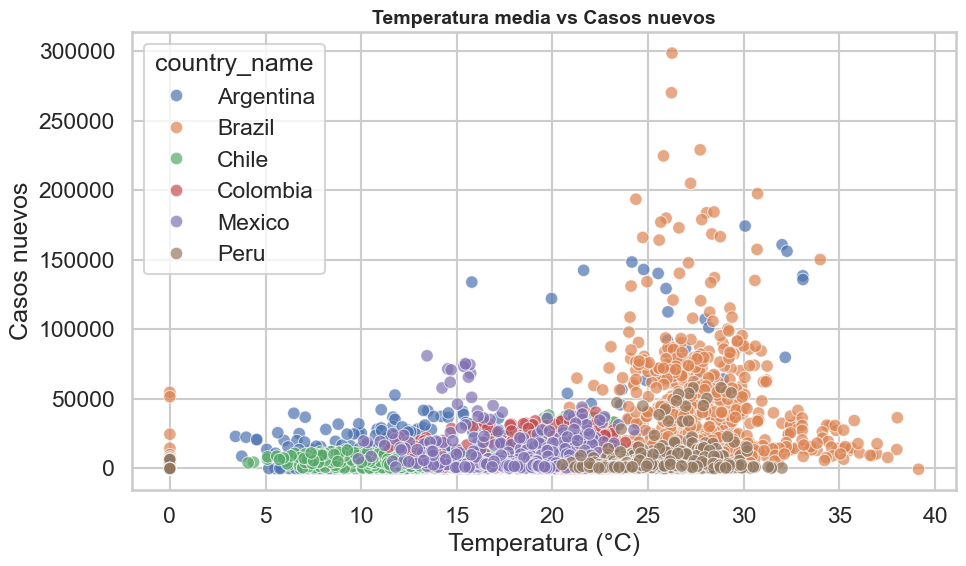

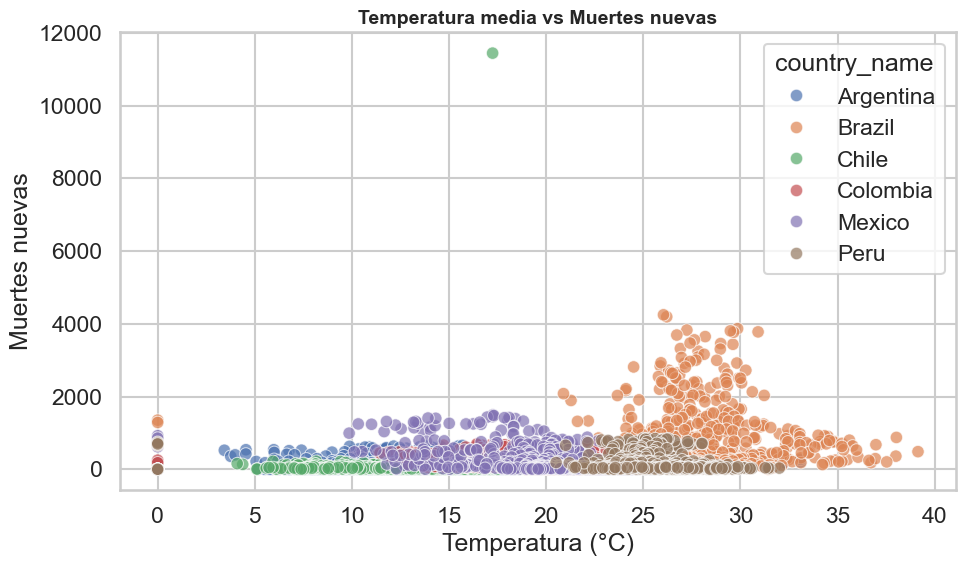

In [46]:
# Dispersión: 
# temperatura vs casos confirmados
grafico_dispersion("temp_mean", "new_cases",
            "Temperatura media vs Casos nuevos",
            "Temperatura (°C)", "Casos nuevos", hue=COLS["country"])

# temperatura vs muertes confirmadas
grafico_dispersion("temp_mean", "new_deaths",
            "Temperatura media vs Muertes nuevas",
            "Temperatura (°C)", "Muertes nuevas", hue=COLS["country"])

C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\858786018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_graficos, x=COLS["country"], y=COLS["temp_mean"], palette=biogenesys_palette)
C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\858786018.py:2: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_graficos, x=COLS["country"], y=COLS["temp_mean"], palette=biogenesys_palette)


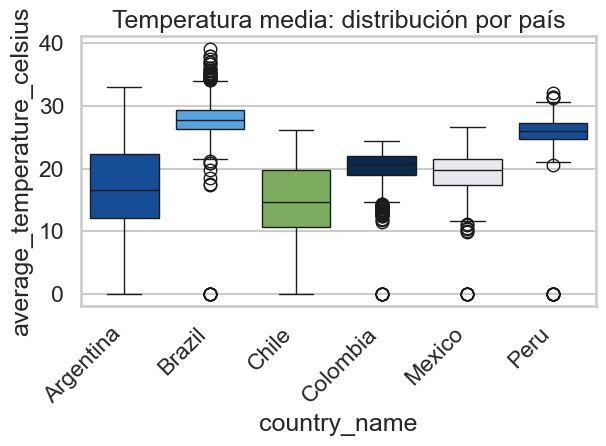

In [47]:
#Boxplot de temperatura media por país:
sns.boxplot(data=df_graficos, x=COLS["country"], y=COLS["temp_mean"], palette=biogenesys_palette)
plt.title("Temperatura media: distribución por país"); plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()


C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\2365662819.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x, x=COLS["country"], y=col, ax=ax, palette=biogenesys_palette)
C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\2365662819.py:14: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=x, x=COLS["country"], y=col, ax=ax, palette=biogenesys_palette)


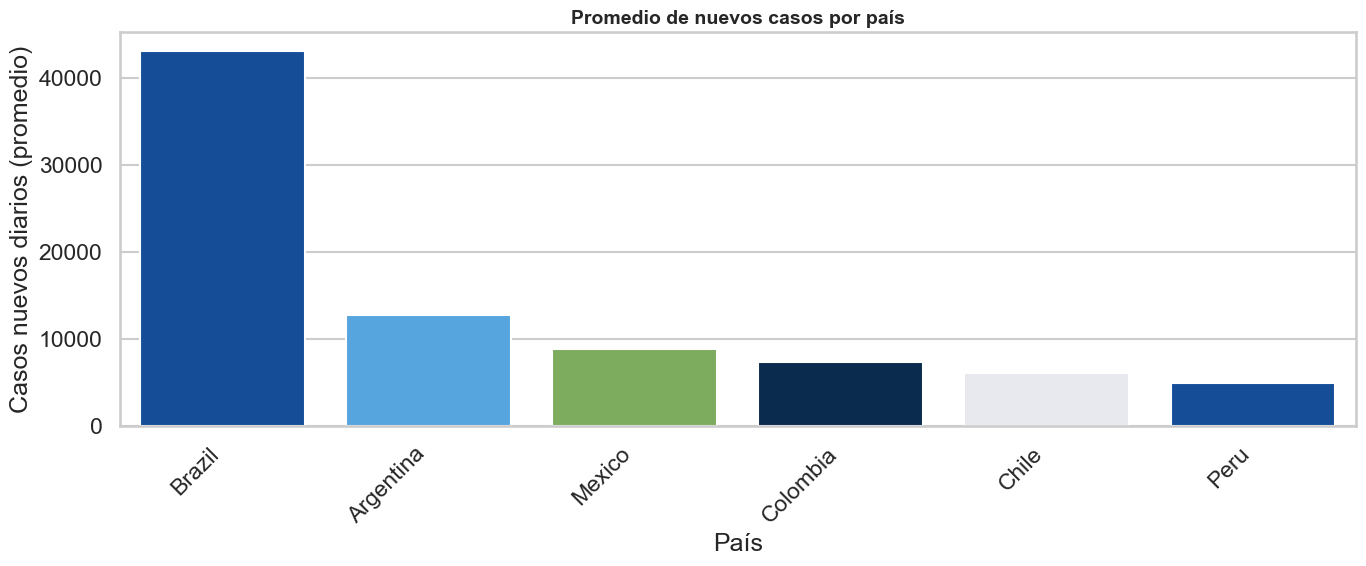

In [48]:
# Análisis epidemiológico (COVID-19)
# Promedio de nuevos casos por país: 

bar_promedio_por_pais("new_cases", "Promedio de nuevos casos por país", "Casos nuevos diarios (promedio)")

C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\3029324440.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=casos_por_millon, x=COLS["country"], y="casos_por_millon", palette=biogenesys_palette)
C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\3029324440.py:12: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=casos_por_millon, x=COLS["country"], y="casos_por_millon", palette=biogenesys_palette)


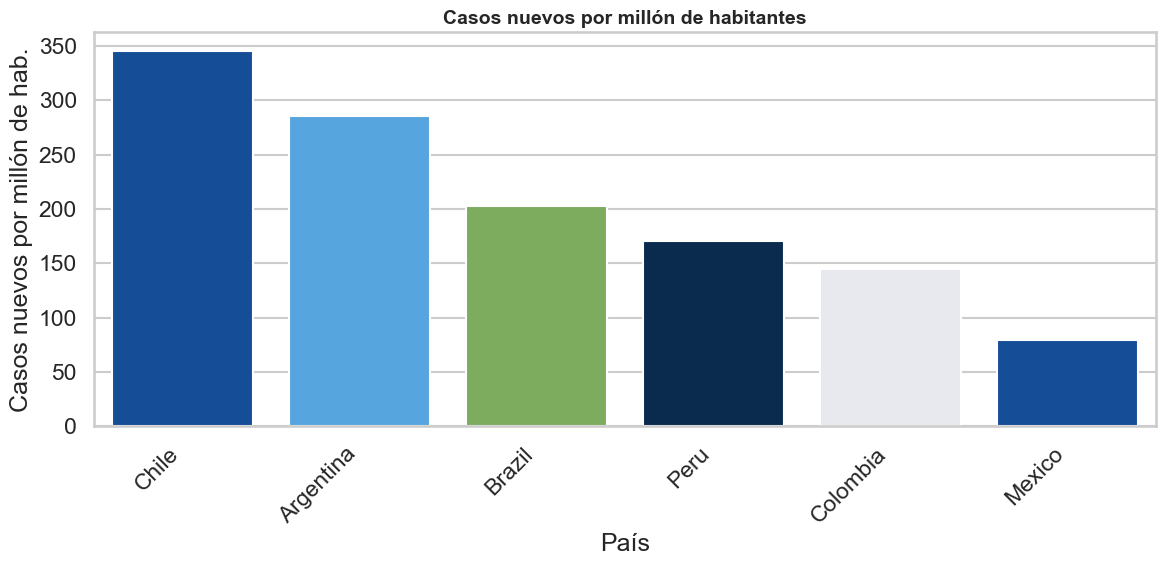

In [49]:
# Normalización de los datos para independizar la población por país. 
#Casos cada 1M de habitantes. 
if COLS["new_cases"] and COLS["pop"]:
    casos_por_millon = (
        df_graficos.groupby(COLS["country"], as_index=False)[[COLS["new_cases"], COLS["pop"]]]
        .mean()
        .assign(casos_por_millon=lambda d: (d[COLS["new_cases"]] / d[COLS["pop"]]) * 1_000_000)
        .sort_values("casos_por_millon", ascending=False)
    )

    plt.figure(figsize=(12,6))
    sns.barplot(data=casos_por_millon, x=COLS["country"], y="casos_por_millon", palette=biogenesys_palette)
    plt.title("Casos nuevos por millón de habitantes", fontsize=14, fontweight="bold")
    plt.xlabel("País"); plt.ylabel("Casos nuevos por millón de hab.")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\2365662819.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x, x=COLS["country"], y=col, ax=ax, palette=biogenesys_palette)
C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\2365662819.py:14: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=x, x=COLS["country"], y=col, ax=ax, palette=biogenesys_palette)


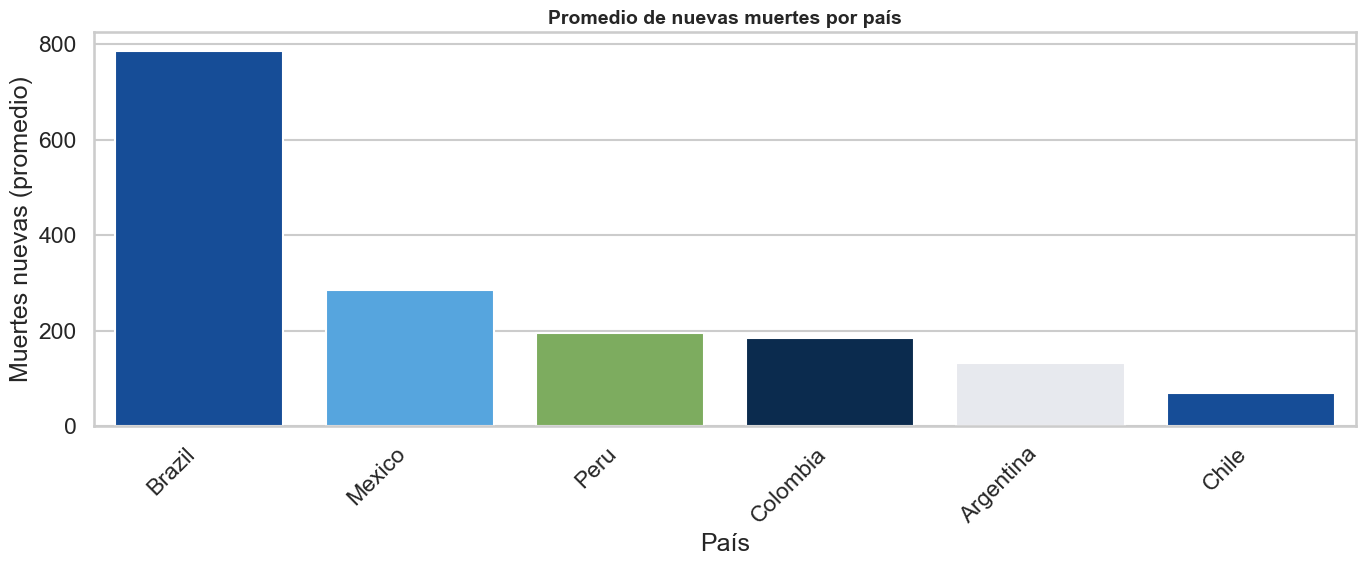

In [50]:
#Promedio de muertes diarias por país
bar_promedio_por_pais("new_deaths", "Promedio de nuevas muertes por país", "Muertes nuevas (promedio)")

C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\2065961062.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=muertes_por_millon, x=COLS["country"], y="muertes_por_millon", palette=biogenesys_palette)
C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\2065961062.py:11: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=muertes_por_millon, x=COLS["country"], y="muertes_por_millon", palette=biogenesys_palette)


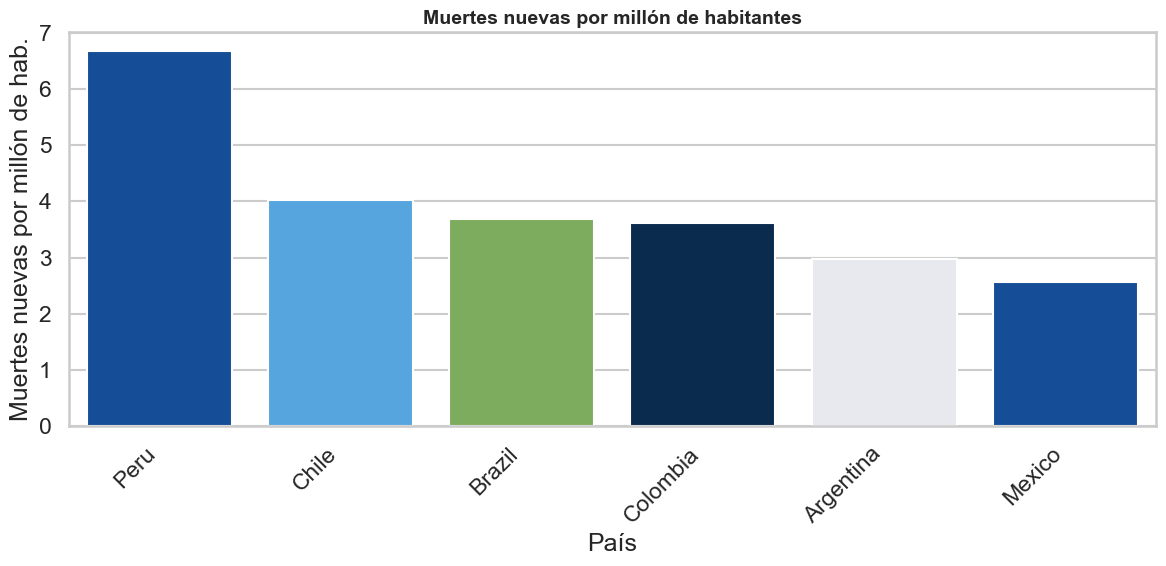

In [51]:
# Normalizacion de datos: Muertes nuevas por millón de habitantes
if COLS["new_deaths"] and COLS["pop"]:
    muertes_por_millon = (
        df_graficos.groupby(COLS["country"], as_index=False)[[COLS["new_deaths"], COLS["pop"]]]
        .mean()
        .assign(muertes_por_millon=lambda d: (d[COLS["new_deaths"]] / d[COLS["pop"]]) * 1_000_000)
        .sort_values("muertes_por_millon", ascending=False)
    )

    plt.figure(figsize=(12,6))
    sns.barplot(data=muertes_por_millon, x=COLS["country"], y="muertes_por_millon", palette=biogenesys_palette)
    plt.title("Muertes nuevas por millón de habitantes", fontsize=14, fontweight="bold")
    plt.xlabel("País")
    plt.ylabel("Muertes nuevas por millón de hab.")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

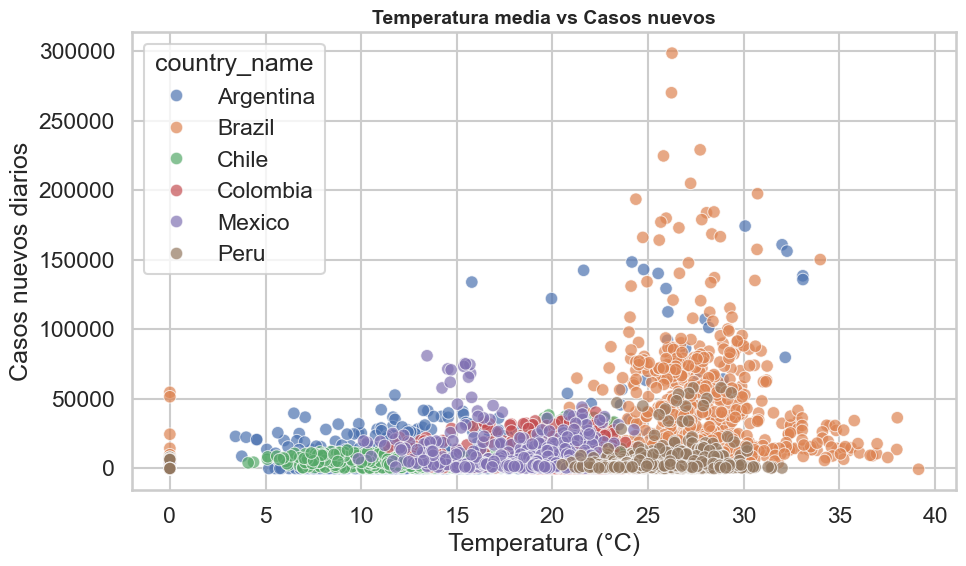

In [52]:
# Relación entre temperatura media y casos nuevos de COVID-19
grafico_dispersion("temp_mean", "new_cases",
             "Temperatura media vs Casos nuevos", 
             "Temperatura (°C)", "Casos nuevos diarios",
              hue=COLS["country"])

C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\2365662819.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x, x=COLS["country"], y=col, ax=ax, palette=biogenesys_palette)
C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\2365662819.py:14: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=x, x=COLS["country"], y=col, ax=ax, palette=biogenesys_palette)


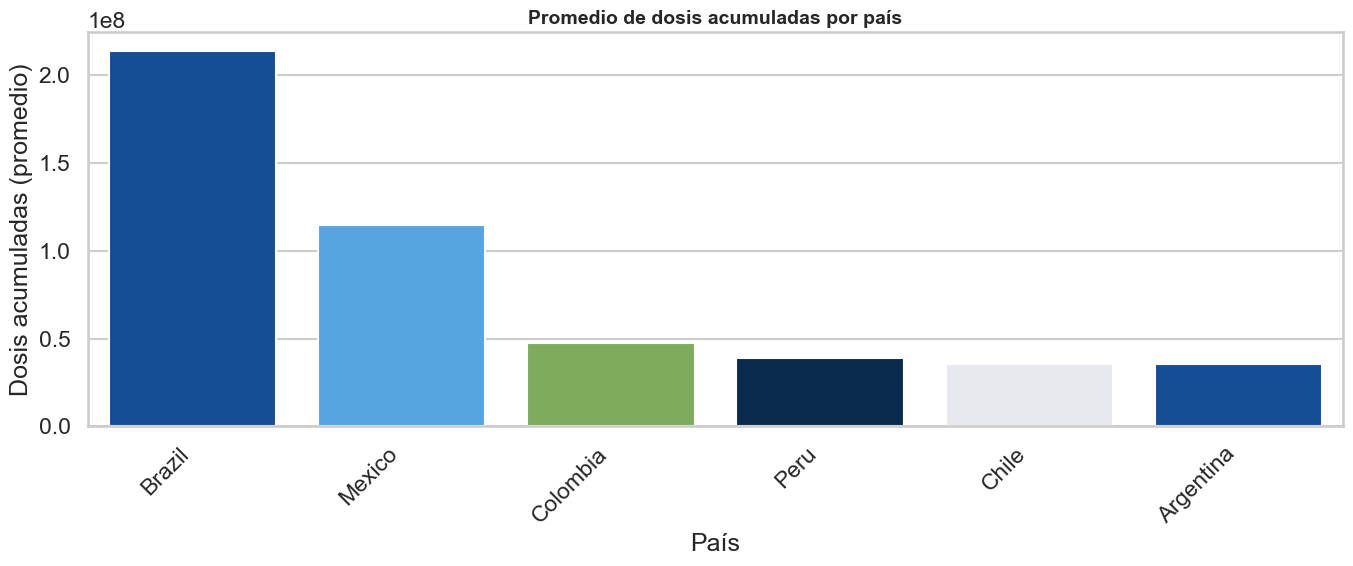

In [53]:
#Dosis acumuladas por pais: 
bar_promedio_por_pais("cum_vacc", 
                      "Promedio de dosis acumuladas por país", 
                      "Dosis acumuladas (promedio)")

C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\2914406792.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dosis_por_millon, x=COLS["country"], y="dosis_por_millon", palette=biogenesys_palette)
C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\2914406792.py:11: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=dosis_por_millon, x=COLS["country"], y="dosis_por_millon", palette=biogenesys_palette)


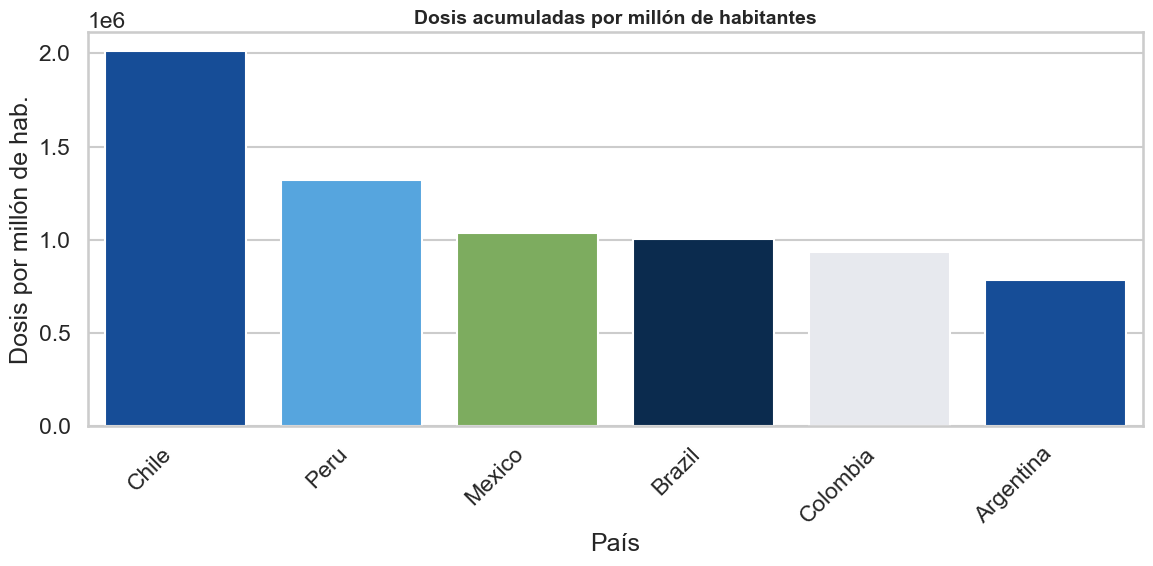

In [54]:
# Dosis acumuladas por millón de habitantes
if COLS["cum_vacc"] and COLS["pop"]:
    dosis_por_millon = (
        df_graficos.groupby(COLS["country"], as_index=False)[[COLS["cum_vacc"], COLS["pop"]]]
        .mean()
        .assign(dosis_por_millon=lambda d: (d[COLS["cum_vacc"]] / d[COLS["pop"]]) * 1_000_000)
        .sort_values("dosis_por_millon", ascending=False)
    )

    plt.figure(figsize=(12,6))
    sns.barplot(data=dosis_por_millon, x=COLS["country"], y="dosis_por_millon", palette=biogenesys_palette)
    plt.title("Dosis acumuladas por millón de habitantes", fontsize=14, fontweight="bold")
    plt.xlabel("País")
    plt.ylabel("Dosis por millón de hab.")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

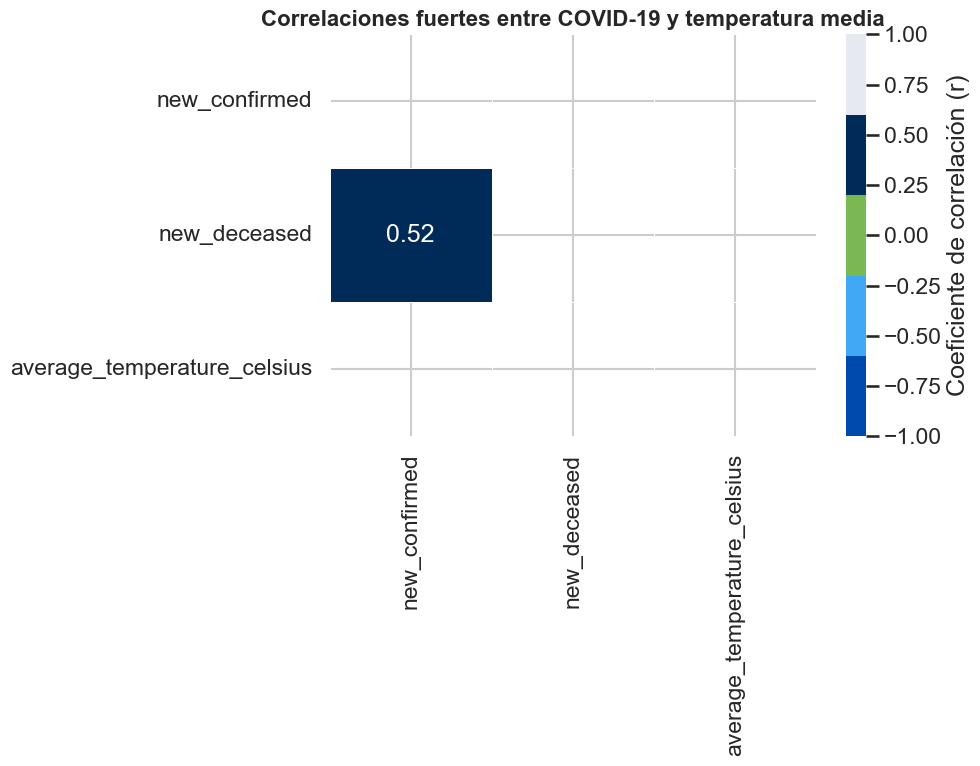

In [55]:
corr_heatmap_corr_fuertes(["new_cases","new_deaths","temp_mean"], 
                          min_abs=0.5, 
                          title="Correlaciones fuertes entre COVID-19 y temperatura media")

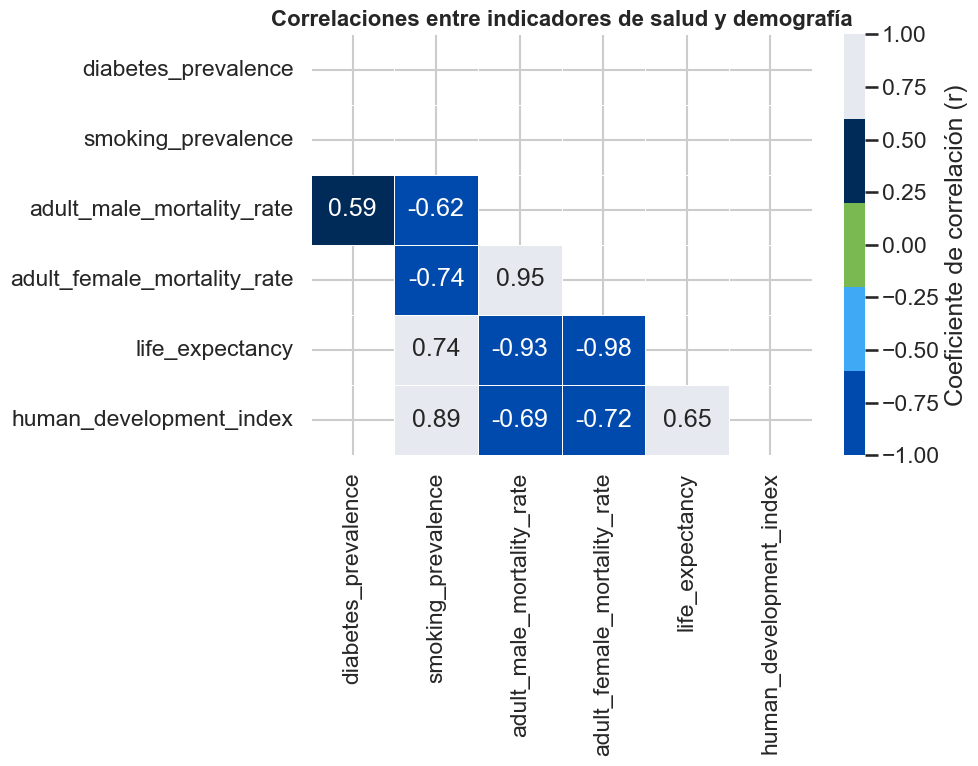

In [56]:
corr_heatmap_corr_fuertes(["diabetes_prevalence","smoking_prevalence","mort_male",
                           "mort_female","life_expectancy","human_development_index"], 
                          title="Correlaciones entre indicadores de salud y demografía")

In [57]:
#Disponibilidad de personal sanitario.

# Agrupar por país y calcular media y desvío estándar de médicos y enfermeros
disponibilidad_sanitaria = (
    df_graficos.groupby(COLS["country"])[[COLS["physicians"], COLS["nurses"]]]
    .agg(['mean', 'std'])
    .round(2)
)

# Mostrar resultados
print(disponibilidad_sanitaria)

             physicians_per_1000      nurses_per_1000     
                            mean  std            mean  std
country_name                                              
Argentina                   3.99  0.0            2.60  0.0
Brazil                      2.16  0.0           10.12  0.0
Chile                       2.59  0.0           13.32  0.0
Colombia                    2.18  0.0            1.33  0.0
Mexico                      2.38  0.0            2.40  0.0
Peru                        1.30  0.0            2.44  0.0


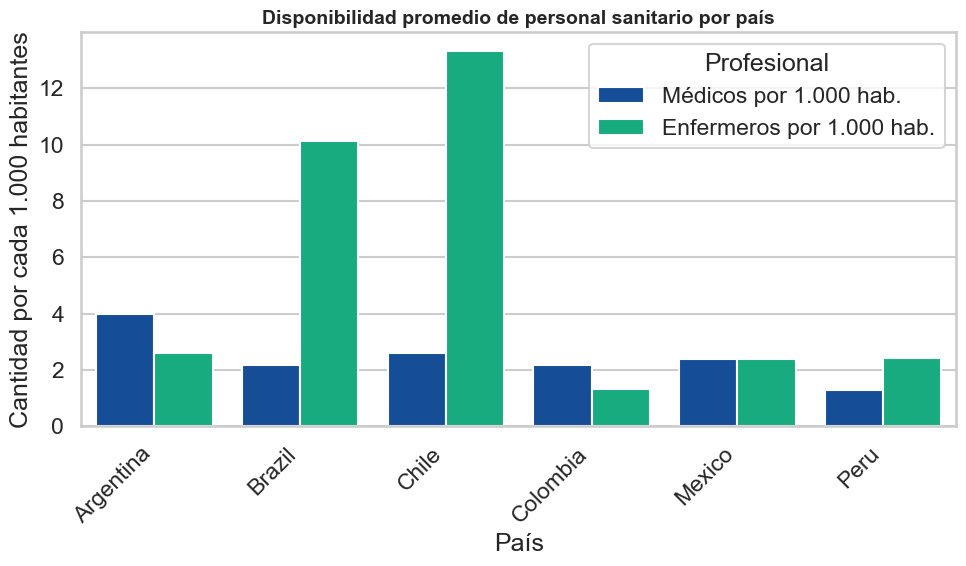

In [58]:
# Crear un DataFrame solo con las medias
media_sanitario = (
    df_graficos.groupby(COLS["country"], as_index=False)[[COLS["physicians"], COLS["nurses"]]]
    .mean()
    .rename(columns={COLS["physicians"]: "Médicos por 1.000 hab.",
                     COLS["nurses"]: "Enfermeros por 1.000 hab."})
)

# Reorganizar df:
media_melted = media_sanitario.melt(
    id_vars=COLS["country"],
    var_name="Profesional",
    value_name="Cantidad por 1.000 hab."
)

# Paleta personalizada: azul para médicos, verde para enfermeros
colores_sanitarios = ["#004AAD", "#00C389"] 

plt.figure(figsize=(10,6))
sns.barplot(
    data=media_melted,
    x=COLS["country"],
    y="Cantidad por 1.000 hab.",
    hue="Profesional",
    palette=colores_sanitarios
)
plt.title("Disponibilidad promedio de personal sanitario por país", fontsize=14, fontweight="bold")
plt.xlabel("País")
plt.ylabel("Cantidad por cada 1.000 habitantes")
plt.legend(title="Profesional")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# AVANCE 3

In [59]:
#Importación de librerías: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code.
df_final_filtrado = pd.read_csv("C:/HENRYPYTHON/DatosFinalesFiltrado.csv")

#Verificación de nulos
print("\nVerificación de columnas con nulos:")
if df_final_filtrado.isnull().any().any():
    print("Hay columnas con valores nulos:")
    nulos = df_final_filtrado.isnull().sum()
    print(nulos[nulos > 0])
else:
    print("No hay columnas con valores nulos.")

# Mostrar las primeras filas para verificar
df_final_filtrado.head(6)


Verificación de columnas con nulos:
No hay columnas con valores nulos.


,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,gdp_usd,gdp_per_capita_usd,latitude,longitude,area_sq_km,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,nurses_per_1000,physicians_per_1000,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
0,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,16.515,0.825,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0,4.496634e+11,10006.0,-34.0,-64.0,2780400.0,21.8,5.9,8.8,2.5996,3.9901,27.740741,18.098765,33.962963,0.000000,43.581350,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
1,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,16.515,0.825,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0,4.496634e+11,10006.0,-34.0,-64.0,2780400.0,21.8,5.9,8.8,2.5996,3.9901,21.956790,17.950617,33.456790,13.144500,74.880846,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
2,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,16.515,0.825,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0,4.496634e+11,10006.0,-34.0,-64.0,2780400.0,21.8,5.9,8.8,2.5996,3.9901,24.894444,18.072222,30.244444,1.498600,60.805923,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
3,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,16.515,0.825,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0,4.496634e+11,10006.0,-34.0,-64.0,2780400.0,21.8,5.9,8.8,2.5996,3.9901,20.104938,16.135802,30.685185,8.286750,72.972595,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
4,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,16.515,0.825,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0,4.496634e+11,10006.0,-34.0,-64.0,2780400.0,21.8,5.9,8.8,2.5996,3.9901,20.919753,13.290123,26.580247,5.108222,52.241997,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
5,AR,2021-01-07,AR,Argentina,13722.0,160.0,1731824.0,47453.0,42092.0,44938712.0,19523766.0,20593330.0,3599141.0,41339571.0,16.515,0.825,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0,4.496634e+11,10006.0,-34.0,-64.0,2780400.0,21.8,5.9,8.8,2.5996,3.9901,25.122222,12.755556,32.383333,0.000000,39.691672,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8


In [61]:
# Normalización de los nombres de las columnas
df_final_filtrado.columns = [c.strip().lower() for c in df_final_filtrado.columns]

In [62]:
df.columns.tolist()

['location_key',
 'date',
 'country_code',
 'country_name',
 'new_confirmed',
 'new_deceased',
 'cumulative_confirmed',
 'cumulative_deceased',
 'cumulative_vaccine_doses_administered',
 'population',
 'population_male',
 'population_female',
 'population_rural',
 'population_urban',
 'population_density',
 'human_development_index',
 'population_age_00_09',
 'population_age_10_19',
 'population_age_20_29',
 'population_age_30_39',
 'population_age_40_49',
 'population_age_50_59',
 'population_age_60_69',
 'population_age_70_79',
 'population_age_80_and_older',
 'gdp_usd',
 'gdp_per_capita_usd',
 'latitude',
 'longitude',
 'area_sq_km',
 'smoking_prevalence',
 'diabetes_prevalence',
 'infant_mortality_rate',
 'nurses_per_1000',
 'physicians_per_1000',
 'average_temperature_celsius',
 'minimum_temperature_celsius',
 'maximum_temperature_celsius',
 'rainfall_mm',
 'relative_humidity',
 'population_largest_city',
 'area_rural_sq_km',
 'area_urban_sq_km',
 'life_expectancy',
 'adult_male_m

In [63]:
#Detectar columnas clave
def pick(*candidates):
    for c in candidates:
        if c in df_final_filtrado.columns:
            return c
    return None

col_date = pick("date", "fecha")
col_country = pick("country_name", "pais", "country")
col_new_cases = pick("new_confirmed", "new_cases")
col_new_deaths = pick("new_deceased", "new_deaths")
col_actives   = pick("active_cases", "casos_activos")
col_recovered = pick("new_recovered", "cumulative_recovered", "recuperados")
col_vax_cum   = pick("cumulative_vaccine_doses_administered", "vaccine_doses_cumulative")
col_vax_new   = pick("new_vaccine_doses_administered", "new_vaccinations")
col_temp      = pick("average_temperature_celsius", "avg_temp", "temperatura_promedio")
col_urban     = pick("population_urban", "urban_population")
col_age65     = pick("population_age_65_plus", "poblacion_mayores_65")
col_age_00_09  = pick("population_age_00_09")
col_age_10_19  = pick("population_age_10_19")
col_age_20_29  = pick("population_age_20_29")
col_age_30_39  = pick("population_age_30_39")
col_age_40_49  = pick("population_age_40_49")
col_age_50_59  = pick("population_age_50_59")
col_age_60_69  = pick("population_age_60_69")
col_age_70_79  = pick("population_age_70_79")
col_age_80_plus = pick("population_age_80_and_older")

In [64]:
# Ordenamiento del DF

df = df_final_filtrado.sort_values([col_country, col_date])


In [65]:
#Corroborar los paises filtrados
df[col_country].unique()
df[col_date] = pd.to_datetime(df[col_date], errors="coerce")

In [66]:
#Mostrar primera y ultima fecha disponible para cada pais.
print(df[[col_country, col_date]].groupby(col_country).agg(
    inicio=("date","min"), fin=("date","max") if col_date=="date" else (col_date,"max")
))

                 inicio        fin
country_name                      
Argentina    2021-01-02 2022-09-17
Brazil       2021-01-02 2022-09-17
Chile        2021-01-02 2022-09-17
Colombia     2021-01-02 2022-09-17
Mexico       2021-01-02 2022-09-17
Peru         2021-01-02 2022-09-17


In [67]:
#Resampleo: agrupar por semana o por mes

# Agrupamos por mes (suma mensual de casos)
mensual = (df.set_index(col_date)
             .groupby(col_country)[col_new_cases]
             .resample("M")
             .sum()
             .reset_index())

C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\1707871038.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


In [68]:
# Paleta Biogenesys personalizada. 

biogenesys_palette = {
    "#004AAD",  # azul oscuro
    "#3FA9F5",  # celeste
    "#00C389",  # verde
    "#002B59",  # azul petróleo
    "#8FA3BF",  # gris azulado
    "#454546",  # gris claro
    "#093C08",  # verde menta
    "#60A488",  # azul pastel
    "#334353"   # gris azulado intermedio
}

# Aplicar estilo general
sns.set_theme(style="whitegrid", context="talk")

In [74]:
# Paleta por país (ajustá países según tu df)
biogenesys_palette = {
    "Argentina": "#0F697F",
    "Brasil":    "#75AB6E",
    "Chile":     "#2397B4",
    "Colombia":  "#60A488",
    "México":    "#002B59",
    "Perú":      "#8FA3BF"
}

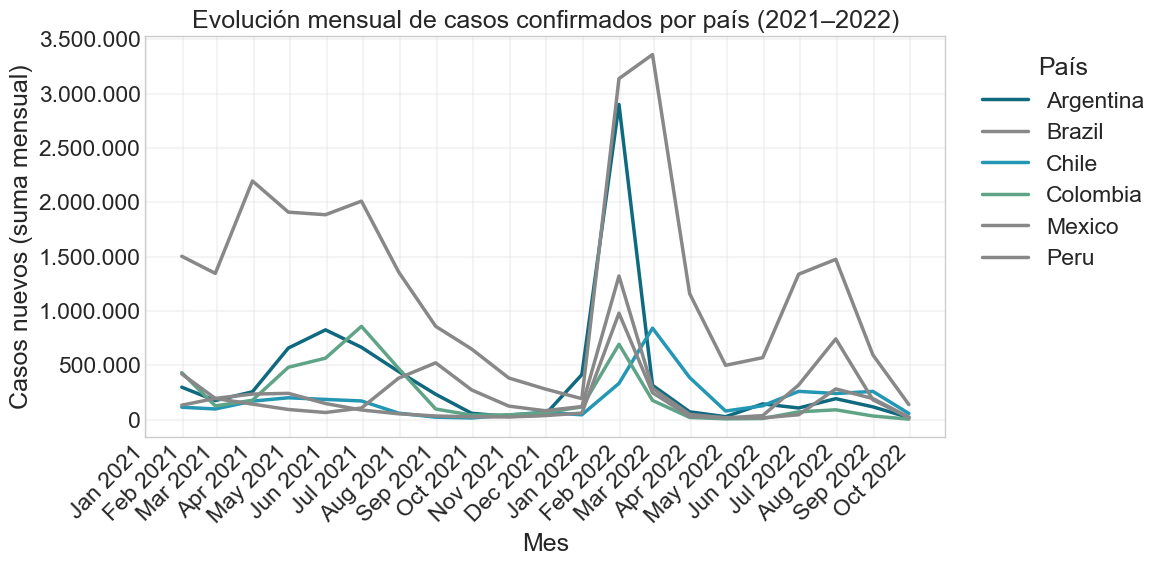

In [75]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(12,6))
plt.style.use("seaborn-v0_8-whitegrid")

for pais, datos in mensual.groupby(col_country):
    plt.plot(datos[col_date], datos[col_new_cases],
             label=pais,
             color=biogenesys_palette.get(pais, "#888888"),
             linewidth=2.5)
    
plt.title("Evolución mensual de casos confirmados por país (2021–2022)")
plt.xlabel("Mes")
plt.ylabel("Casos nuevos (suma mensual)")
plt.legend(title="País", loc="upper left", bbox_to_anchor=(1.02, 1))
plt.grid(alpha=0.2)

# Eje X → mostrar meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45, ha="right")

# Eje Y → formato miles con punto
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f"{int(x):,}".replace(",", ".")))

plt.tight_layout()
plt.savefig("C:/HENRYPYTHON/evolucion_mensual_por_pais.png", dpi=300, bbox_inches="tight")
plt.show()

In [70]:
# Calculamos media móvil de 7 días 
df["media_movil_7d"] = df.groupby(col_country)[col_new_cases].transform( lambda x: x.rolling(window=7).mean())
#Se crea una nueva columna "media_movil_7d" que contiene, para cada día, el promedio de los últimos 7 días de casos confirmados.

C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\3940825530.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


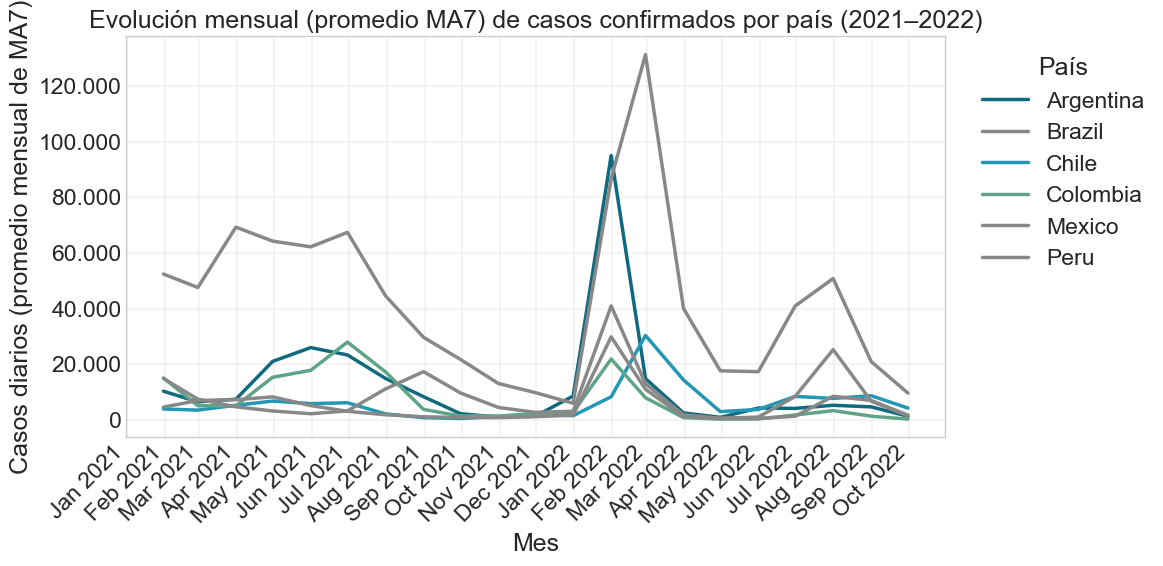

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aseguramos que exista la columna MA7 (usa min_periods=1 para evitar NaN al inicio)
if "media_movil_7d" not in df.columns:
    df["media_movil_7d"] = df.groupby(col_country)[col_new_cases] \
                             .transform(lambda s: s.rolling(7, min_periods=1).mean())

# Promedio mensual de la MA7 (nivel diario típico del mes)
mensual_ma7 = (df.set_index(col_date)
                 .groupby(col_country)["media_movil_7d"]
                 .resample("M")           
                 .mean()                  
                 .reset_index())


# Gráfico 
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(12,6))
plt.style.use("seaborn-v0_8-whitegrid")

for pais, datos in mensual_ma7.groupby(col_country):
    plt.plot(datos[col_date], datos["media_movil_7d"],
             label=pais,
             color=biogenesys_palette.get(pais, "#888888"),
             linewidth=2.5)

plt.title("Evolución mensual (promedio MA7) de casos confirmados por país (2021–2022)")
plt.xlabel("Mes")
plt.ylabel("Casos diarios (promedio mensual de MA7)")
plt.legend(title="País", loc="upper left", bbox_to_anchor=(1.02, 1))
plt.grid(alpha=0.2)

# Eje X 
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45, ha="right")

# Eje Y 
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f"{int(x):,}".replace(",", ".")))

plt.tight_layout()

plt.show()

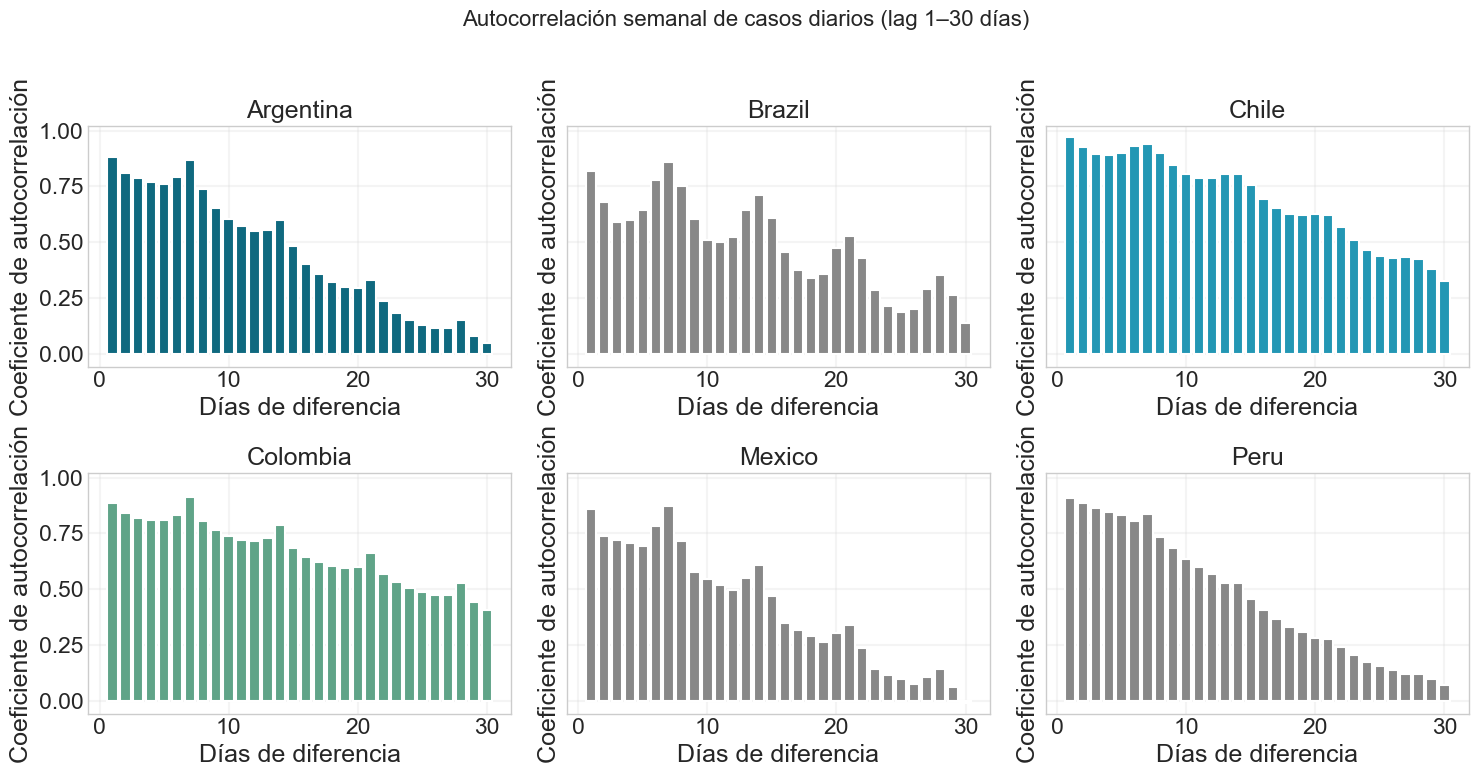

In [77]:
#Autocorrelación semanal. 
import matplotlib.pyplot as plt

paises = df[col_country].unique()
max_lag = 30

# Subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=True)
axes = axes.flatten() # Convierte la matriz de ejes en una lista para poder recorrerlos con un for

for i, pais in enumerate(paises):
    serie = (df[df[col_country] == pais]
             .set_index(col_date)[col_new_cases]
             .asfreq("D").fillna(0))

    acf_vals = [serie.autocorr(lag) for lag in range(1, max_lag + 1)]

    axes[i].bar(range(1, max_lag + 1), acf_vals,
                color=biogenesys_palette.get(pais, "#888888"))
    axes[i].set_title(pais)
    axes[i].set_xlabel("Días de diferencia")
    axes[i].set_ylabel("Coeficiente de autocorrelación")
    axes[i].grid(alpha=0.2)

plt.suptitle("Autocorrelación semanal de casos diarios (lag 1–30 días)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\1385388952.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .asfreq("M"))


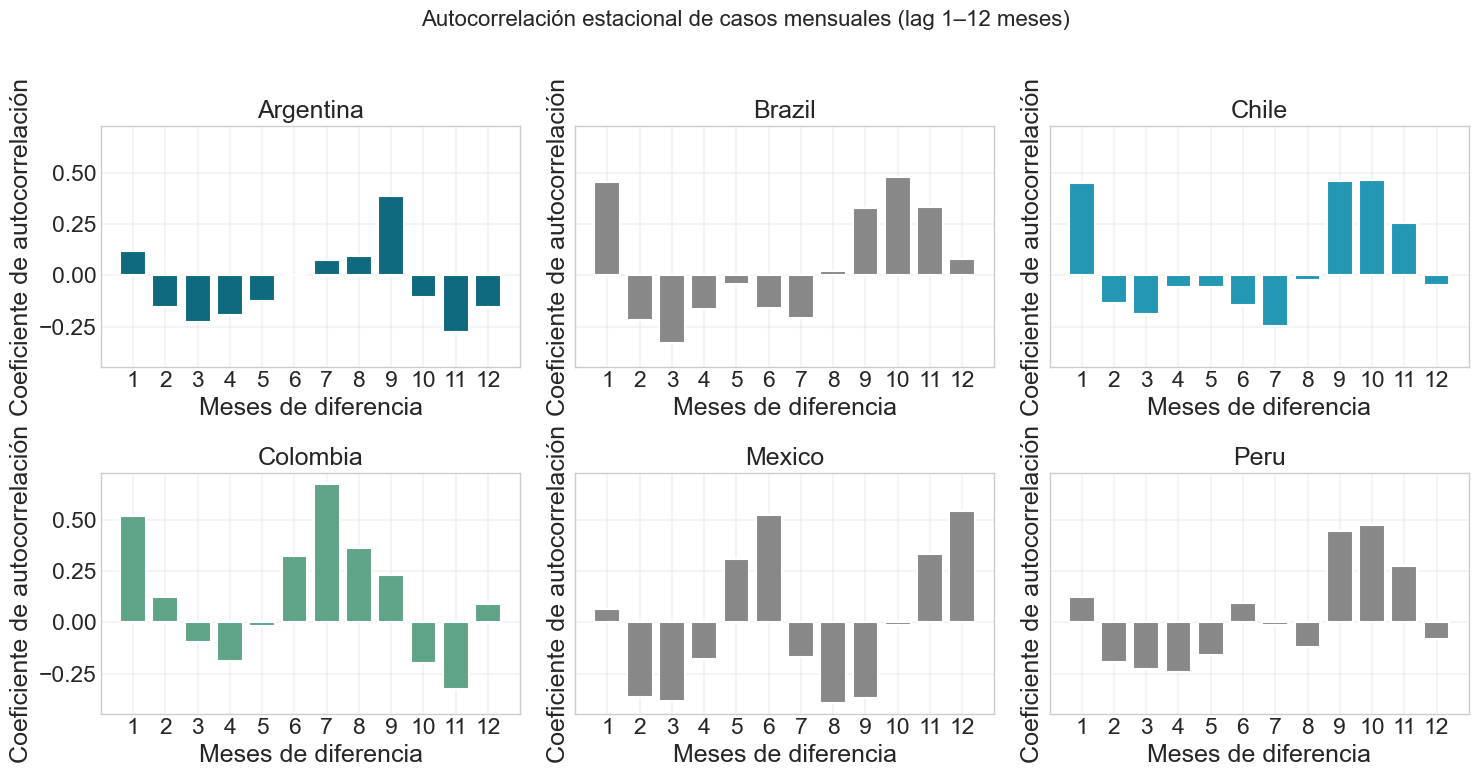

In [78]:
# Autorrelación mensual. 
import matplotlib.pyplot as plt

paises = mensual[col_country].unique()          # los 6 países
max_lag = 12                                    # hasta 12 meses

#Grilla 2x3. 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=True)
axes = axes.flatten()

for i, pais in enumerate(paises):
    
    serie_m = (mensual[mensual[col_country] == pais]
               .set_index(col_date)[col_new_cases]
               .asfreq("M"))         
               
    acf_vals = [serie_m.autocorr(lag) for lag in range(1, max_lag + 1)]

    axes[i].bar(range(1, max_lag + 1), acf_vals,
                color=biogenesys_palette.get(pais, "#888888"))
    axes[i].set_xticks(range(1, max_lag + 1))
    axes[i].set_title(pais)
    axes[i].set_xlabel("Meses de diferencia")
    axes[i].set_ylabel("Coeficiente de autocorrelación")
    axes[i].grid(alpha=0.2)

plt.suptitle("Autocorrelación estacional de casos mensuales (lag 1–12 meses)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [79]:
#Correlación entre casos y vacunación acumulada.
corr_data = df[[col_new_cases, col_vax_cum]]
correlacion = corr_data.corr() 
print(correlacion)

                                       new_confirmed  \
new_confirmed                               1.000000   
cumulative_vaccine_doses_administered       0.251988   

                                       cumulative_vaccine_doses_administered  
new_confirmed                                                       0.251988  
cumulative_vaccine_doses_administered                               1.000000  


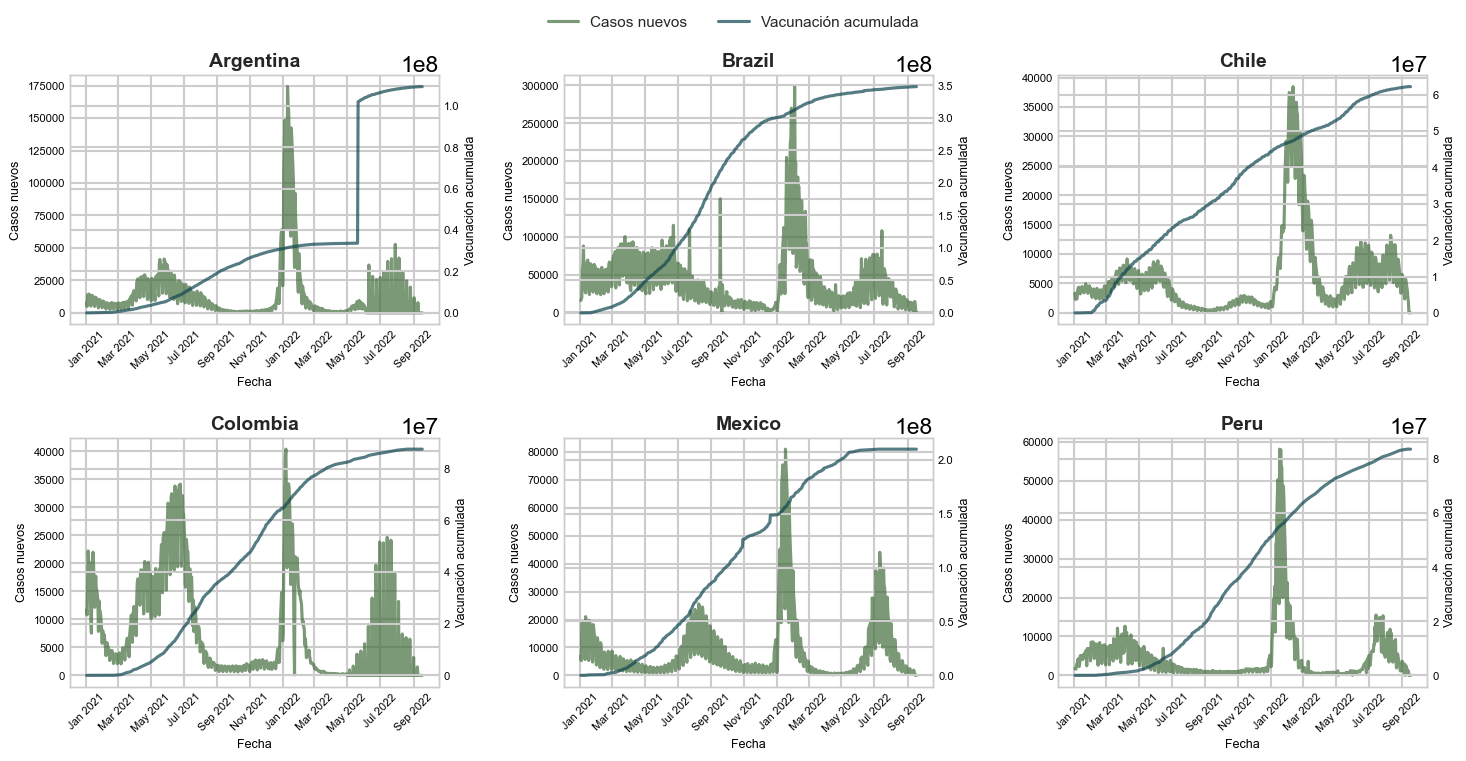

In [80]:
# Casos vs vacunación acumulada por país.
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Lista de países
paises = df[col_country].unique()

# Configuración de la grilla (2x3)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharex=False)
axes = axes.flatten()

for i, pais in enumerate(paises):
    datos = df[df[col_country] == pais]

    # Primer eje: Casos nuevos
    ax1 = axes[i]
    line1, = ax1.plot(datos[col_date], datos[col_new_cases],
                      color="#436D3E", label="Casos nuevos", alpha=0.7)

    ax1.set_title(pais, fontsize=14, fontweight="bold")         
    ax1.set_xlabel("Fecha", color="black", fontsize=9)          
    ax1.set_ylabel("Casos nuevos", color="black", fontsize=9)   
    ax1.tick_params(axis="y", labelcolor="black", labelsize=8) 
    ax1.tick_params(axis="x", labelrotation=45, labelcolor="black", labelsize=8) 

    # Formato de fechas → mostrar meses abreviados
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

    # Segundo eje: Vacunación acumulada
    ax2 = ax1.twinx()
    line2, = ax2.plot(datos[col_date], datos[col_vax_cum],
                      color="#0E454F", label="Vacunación acumulada", alpha=0.7)
    ax2.set_ylabel("Vacunación acumulada", color="black", fontsize=9)
    ax2.tick_params(axis="y", labelcolor="black", labelsize=8)

# --- Leyenda general centrada ---
fig.legend(handles=[line1, line2],
           labels=["Casos nuevos", "Vacunación acumulada"],
           loc="upper center", ncol=2, frameon=False,
           bbox_to_anchor=(0.5, 0.97), fontsize=11)

# Ajuste de márgenes
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


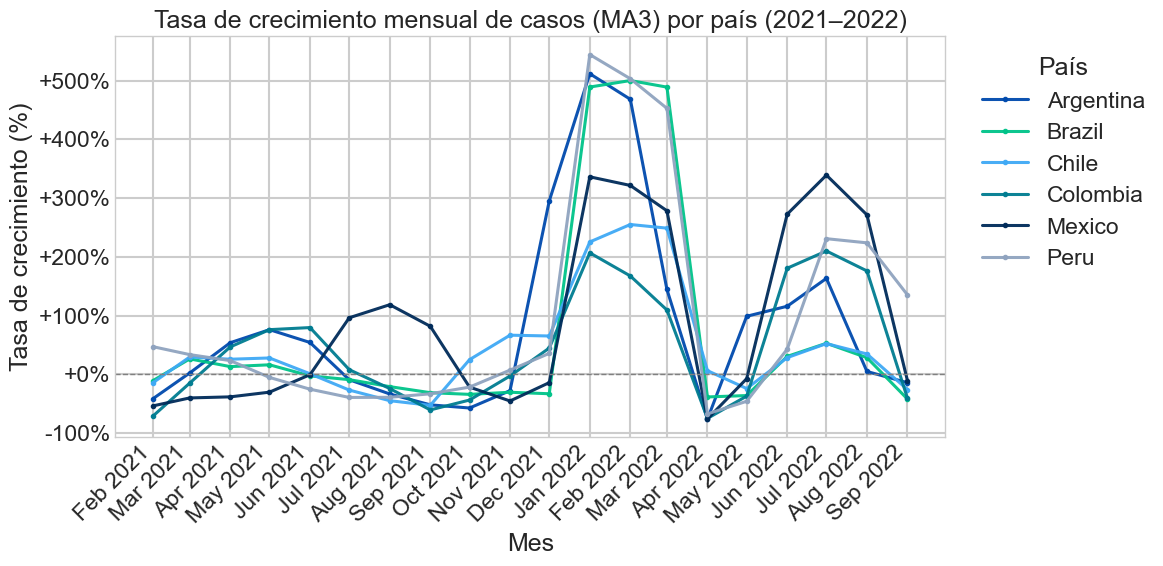

In [81]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

biogenesys_palette = {
    "Argentina": "#004AAD",
    "Brazil":    "#00C389",
    "Chile":     "#3FA9F5",
    "Colombia":  "#007C91",
    "Mexico":    "#002B59",
    "Peru":      "#8FA3BF",
}

# Serie mensual de casos
mensual = (df.set_index(col_date)
             .groupby(col_country)[col_new_cases]
             .resample("MS")              
             .sum()
             .reset_index())


# 2) Tasa de crecimiento mensual (%). 
mensual["tasa_%"] = (mensual
                     .groupby(col_country)[col_new_cases]
                     .pct_change()*100)


# 3) Suavizado: MA3 sobre la tasa
mensual["tasa_ma3_%"] = (mensual
                         .groupby(col_country)["tasa_%"]
                         .transform(lambda s: s.rolling(3, min_periods=1).mean()))

fig, ax = plt.subplots(figsize=(12,6))
plt.style.use("seaborn-v0_8-whitegrid")

for pais, datos in mensual.groupby(col_country):
    datos = datos.sort_values(col_date)
    ax.plot(datos[col_date], datos["tasa_ma3_%"], #promedio móvil de 3 meses sobre la tasa para bajar el ruido
            label=pais,
            color=biogenesys_palette.get(pais, "#888888"),
            linewidth=2.2, marker="o", markersize=3, alpha=0.95)

# línea de referencia en 0% (crece vs decrece)
ax.axhline(0, color="gray", linestyle="--", linewidth=1)

ax.set_title("Tasa de crecimiento mensual de casos (MA3) por país (2021–2022)")
ax.set_xlabel("Mes")
ax.set_ylabel("Tasa de crecimiento (%)")

# eje X mensual
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45, ha="right")

# formateo de porcentaje con signo
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f"{x:+.0f}%"))

ax.legend(title="País", loc="upper left", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\2877244868.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


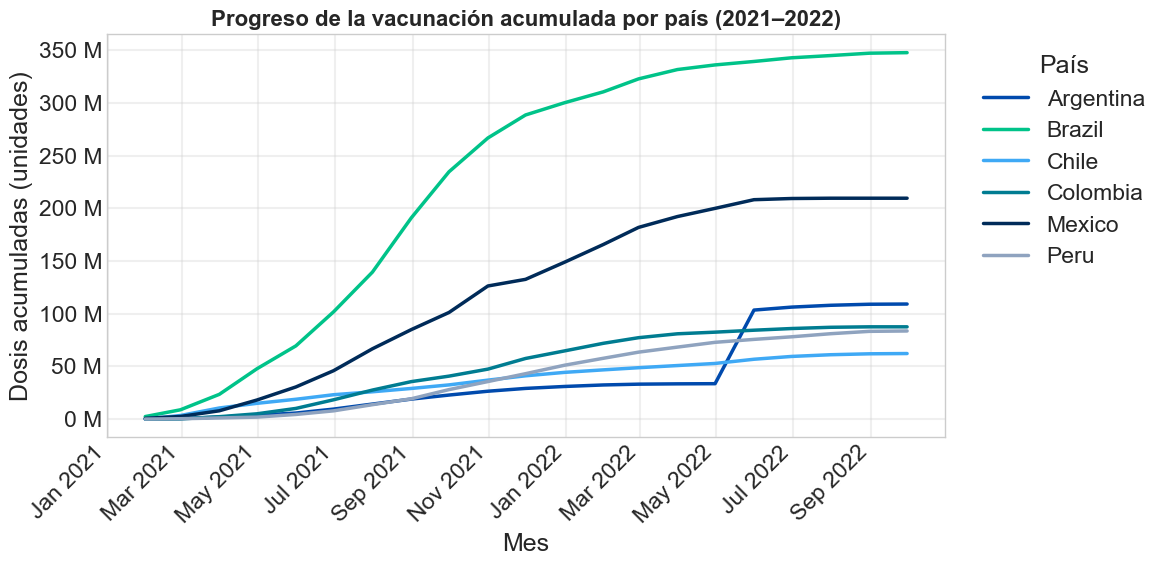

In [82]:
#Progreso de vacunación acumulada por país. 
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Filtrar período y columnas necesarias
vacunas = df[[col_country, col_date, col_vax_cum]]

# Agrupar por país y mes
vacunas_mensual = (
    vacunas
    .set_index(col_date)
    .groupby(col_country)[col_vax_cum]
    .resample("M")
    .max()  # máximo mensual (acumulado)
    .reset_index()
)

plt.figure(figsize=(12,6))
plt.style.use("seaborn-v0_8-whitegrid")

for pais, datos in vacunas_mensual.groupby(col_country):
    plt.plot(datos[col_date], datos[col_vax_cum],
             label=pais,
             color=biogenesys_palette.get(pais, "#888888"),
             linewidth=2.5)

plt.title("Progreso de la vacunación acumulada por país (2021–2022)",
          fontsize=16, fontweight="bold")
plt.xlabel("Mes")
plt.ylabel("Dosis acumuladas (unidades)")
plt.legend(title="País", loc="upper left", bbox_to_anchor=(1.02, 1))
plt.grid(alpha=0.3)

# Formato de fechas
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45, ha="right")

# Eje Y con formato de miles
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f"{int(x/1e6)} M"))

plt.tight_layout()
plt.show()

C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\2550444773.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


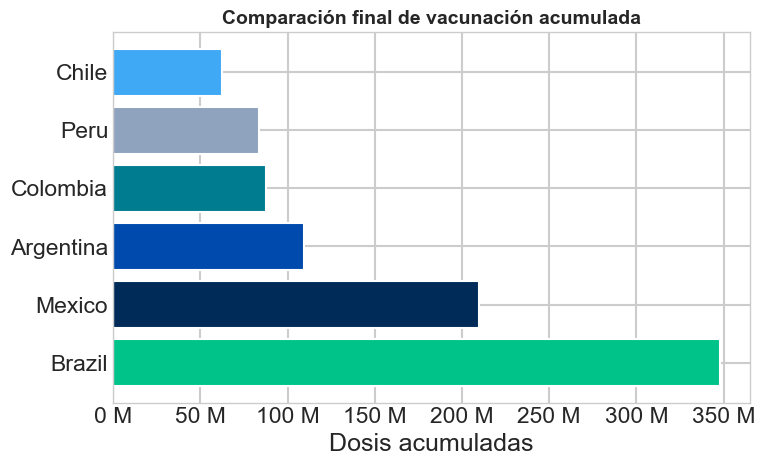

In [83]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
# Cobertura final 
# Dataframe mensual de vacunación acumulada
vacunas = df[[col_country, col_date, col_vax_cum]].dropna()
vacunas = vacunas[vacunas[col_date] >= "2021-01-01"]

vacunas_mensual = (
    vacunas
    .set_index(col_date)
    .groupby(col_country)[col_vax_cum]
    .resample("M")
    .max()  # usamos el valor máximo mensual (acumulado)
    .reset_index()
)

vacunas_final = (
    vacunas_mensual
    .sort_values(col_date)
    .groupby(col_country)
    .tail(1)
    .sort_values(col_vax_cum, ascending=False)
)

plt.figure(figsize=(8,5))
plt.barh(vacunas_final[col_country],
         vacunas_final[col_vax_cum],
         color=[biogenesys_palette.get(p, "#888888") for p in vacunas_final[col_country]])

plt.title("Comparación final de vacunación acumulada",
          fontsize=14, fontweight="bold")
plt.xlabel("Dosis acumuladas")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f"{int(x/1e6)} M"))
plt.tight_layout()
plt.show()

C:\Users\Valentina\AppData\Local\Temp\ipykernel_22668\1337890291.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


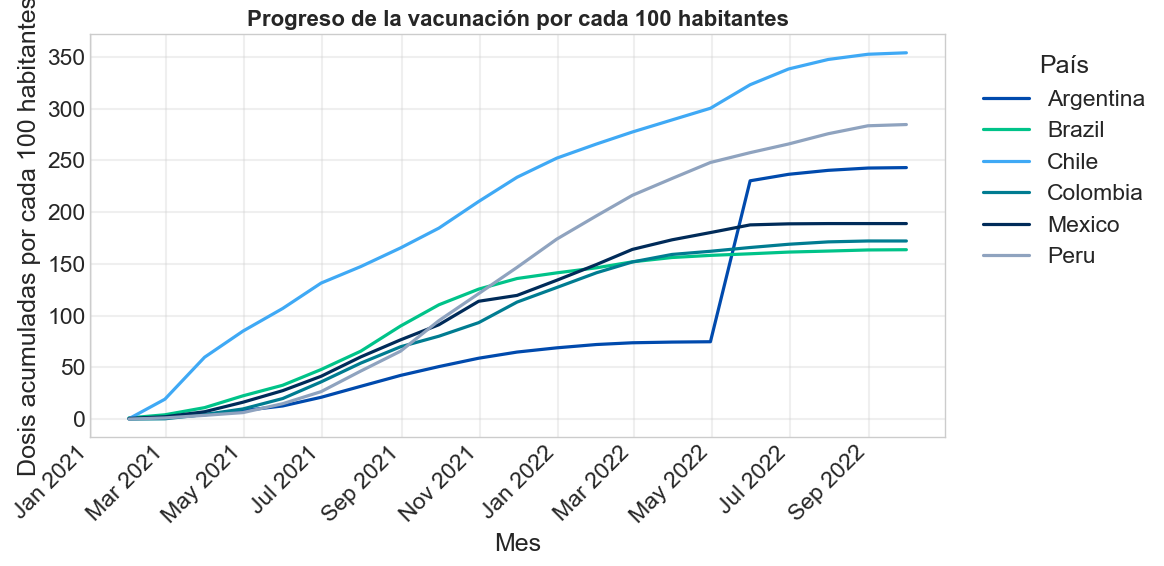

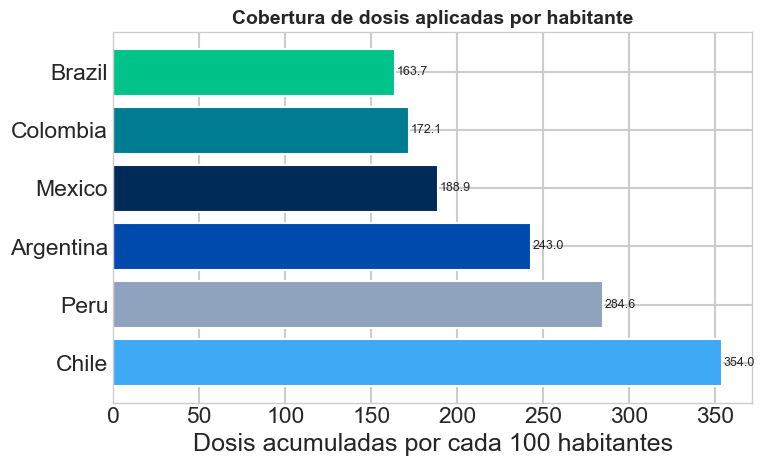

In [84]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Crear df con vacunación y población 

df_vax = df[[col_country, col_date, col_vax_cum, "population"]].dropna()

# Calcular dosis por cada 100 habitantes 
df_vax["vax_por_100hab"] = (df_vax[col_vax_cum] / df_vax["population"]) * 100

#Agrupar por país y mes 
df_vax_mensual = (
    df_vax
    .set_index(col_date)
    .groupby(col_country)["vax_por_100hab"]
    .resample("M")
    .max()   # tomamos el máximo del mes
    .reset_index()
)

# Gráfico de progreso temporal 
plt.figure(figsize=(12,6))
plt.style.use("seaborn-v0_8-whitegrid")

for pais, datos in df_vax_mensual.groupby(col_country):
    plt.plot(datos[col_date], datos["vax_por_100hab"],
             label=pais,
             color=biogenesys_palette.get(pais, "#888888"),
             linewidth=2.3)

plt.title("Progreso de la vacunación por cada 100 habitantes",
          fontsize=16, fontweight="bold")
plt.xlabel("Mes")
plt.ylabel("Dosis acumuladas por cada 100 habitantes")
plt.legend(title="País", loc="upper left", bbox_to_anchor=(1.02, 1))
plt.grid(alpha=0.3)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

# Gráfico final comparativo
vax_final = (
    df_vax_mensual
    .sort_values(col_date)
    .groupby(col_country)
    .tail(1)
    .sort_values("vax_por_100hab", ascending=False)
)

plt.figure(figsize=(8,5))
plt.barh(vax_final[col_country],
         vax_final["vax_por_100hab"],
         color=[biogenesys_palette.get(p, "#888888") for p in vax_final[col_country]])

plt.title("Cobertura de dosis aplicadas por habitante",
          fontsize=14, fontweight="bold")
plt.xlabel("Dosis acumuladas por cada 100 habitantes")

for y, v in enumerate(vax_final["vax_por_100hab"]):
    plt.text(v + 1, y, f"{v:.1f}", va="center", fontsize=9)

plt.tight_layout()
plt.show()

Coeficiente de correlación de Pearson: 0.855


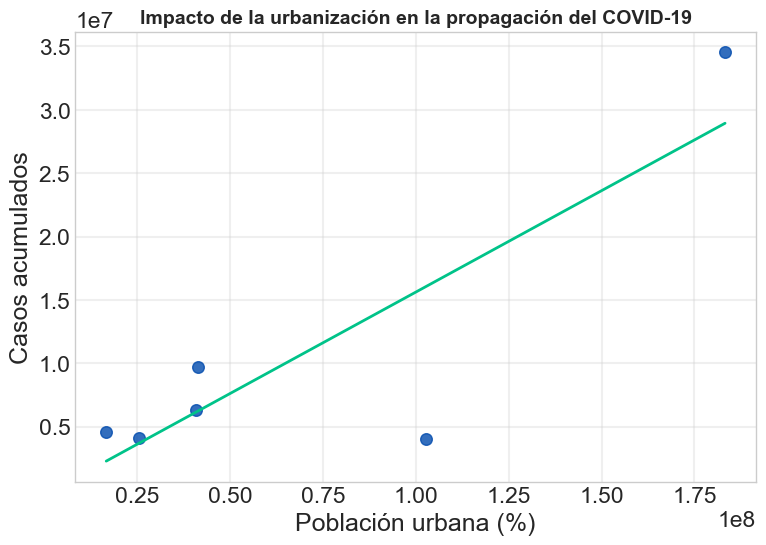

In [85]:
#Dataset:
df_urban = df[[col_country, "population_urban", "cumulative_confirmed"]].dropna()

# Agrupar por país
df_urban_final = (
    df_urban
    .groupby(col_country)
    .agg({"population_urban": "max",
          "cumulative_confirmed": "max"})
    .reset_index()
)

# Calcular correlación
corr = df_urban_final["population_urban"].corr(df_urban_final["cumulative_confirmed"])
print(f"Coeficiente de correlación de Pearson: {corr:.3f}")

# Gráfico de dispersión 
plt.figure(figsize=(8,6))
sns.regplot(data=df_urban_final,
            x="population_urban",
            y="cumulative_confirmed",
            scatter_kws={"s":70, "color":"#004AAD"},
            line_kws={"color":"#00C389", "lw":2},
            ci=None)

plt.title("Impacto de la urbanización en la propagación del COVID-19",
          fontsize=14, fontweight="bold")
plt.xlabel("Población urbana (%)")
plt.ylabel("Casos acumulados")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

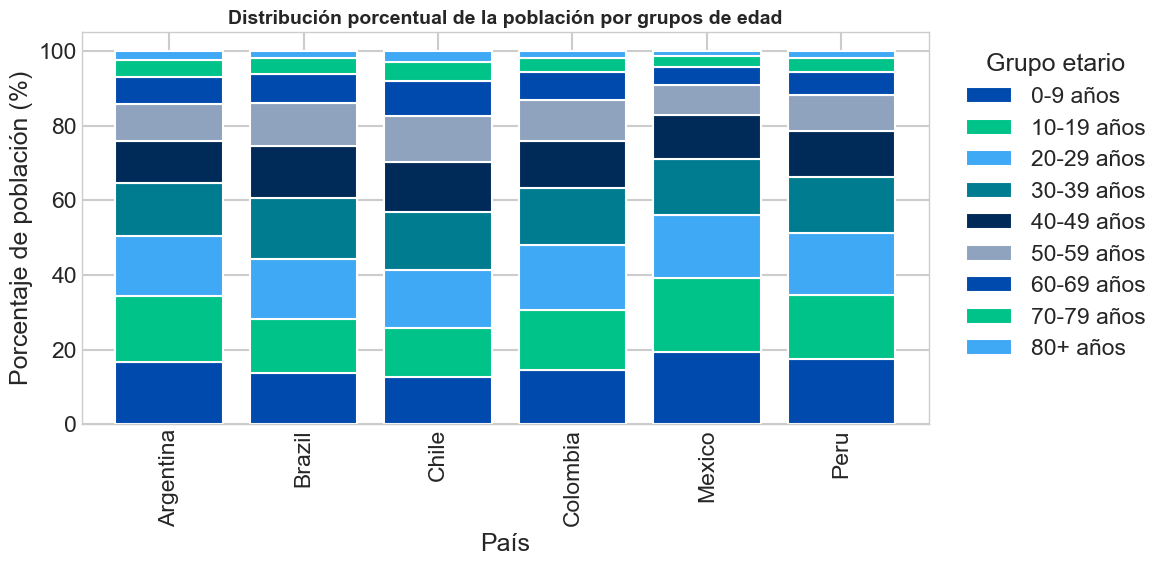

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Definición de columnas "deseadas"
cols_edades_decadas = [
    "population_age_00_09","population_age_10_19","population_age_20_29",
    "population_age_30_39","population_age_40_49","population_age_50_59",
    "population_age_60_69","population_age_70_79","population_age_80_and_older"
]

# 2) Detectar cuáles existen realmente en df
cols_presentes = [c for c in cols_edades_decadas if c in df.columns]

# 3) Si no existen por décadas, usar las agregadas del diccionario
if not cols_presentes:
    if "population_age_00_To_79" in df.columns and "population_age_80_and_older" in df.columns:
        cols_presentes = ["population_age_00_To_79", "population_age_80_and_older"]
        rename_dict = {
            "population_age_00_To_79": "0-79 años",
            "population_age_80_and_older": "80+ años"
        }
    else:
        raise ValueError("No se encontraron columnas de edades compatibles en el DataFrame.")

else:
    # Mapeo legible para décadas (usar guión simple "-" para evitar líos de encoding)
    rename_dict = {
        "population_age_00_09": "0-9 años",
        "population_age_10_19": "10-19 años",
        "population_age_20_29": "20-29 años",
        "population_age_30_39": "30-39 años",
        "population_age_40_49": "40-49 años",
        "population_age_50_59": "50-59 años",
        "population_age_60_69": "60-69 años",
        "population_age_70_79": "70-79 años",
        "population_age_80_and_older": "80+ años"
    }

# 4) Agregar por país y convertir a % (fila = país suma 100)
df_edades = df.groupby(col_country)[cols_presentes].mean().reset_index()
df_edades[cols_presentes] = df_edades[cols_presentes].div(df_edades[cols_presentes].sum(axis=1), axis=0) * 100

# 5) Renombrar columnas a legibles y definir el orden de ploteo
df_edades = df_edades.rename(columns=rename_dict)
cols_legibles = [rename_dict[c] for c in cols_presentes]

# 6) Preparar colores: lista (no dict). Reusar tu paleta.
#    Si tu 'biogenesys_palette' es dict por país -> tomamos sus valores; si es lista, la usamos.
if isinstance(biogenesys_palette, dict):
    base_colors = list(biogenesys_palette.values())
else:
    base_colors = list(biogenesys_palette)

# Asegurar que haya suficientes colores para todos los grupos etarios
if len(base_colors) < len(cols_legibles):
    # repetir colores si faltan
    reps = (len(cols_legibles) + len(base_colors) - 1) // len(base_colors)
    colors_plot = (base_colors * reps)[:len(cols_legibles)]
else:
    colors_plot = base_colors[:len(cols_legibles)]

# 7) Plot
ax = df_edades.set_index(col_country)[cols_legibles].plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    color=colors_plot,
    width=0.8
)

plt.title("Distribución porcentual de la población por grupos de edad", fontsize=14, fontweight="bold")
plt.ylabel("Porcentaje de población (%)")
plt.xlabel("País")
plt.legend(title="Grupo etario", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [87]:
#Creación del df a usar:
df_comorb = df[[col_country, "comorbidity_mortality_rate",
                "cumulative_deceased", "cumulative_confirmed"]].dropna()

# Agrupar por país. 
df_comorb_final = (
    df_comorb.groupby(col_country)
             .agg({
                 "comorbidity_mortality_rate": "mean",
                 "cumulative_deceased": "mean",
                 "cumulative_confirmed": "mean"
             })
             .reset_index()
)

# Calcular tasa de mortalidad general (%)
df_comorb_final["tasa_mortalidad_general"] = (
    df_comorb_final["cumulative_deceased"] / df_comorb_final["cumulative_confirmed"]
) * 100

df_comorb_final

,country_name,comorbidity_mortality_rate,cumulative_deceased,cumulative_confirmed,tasa_mortalidad_general
0,Argentina,15.8,105038.451923,6.040607e+06,1.738872
1,Brazil,16.6,544272.665064,2.246782e+07,2.422454
2,Chile,12.4,39551.091346,2.225258e+06,1.777371
3,Colombia,15.8,123644.418269,4.735107e+06,2.611228
4,Mexico,15.7,152071.161859,2.448789e+06,6.210055
5,Peru,12.6,187743.120192,2.560387e+06,7.332607


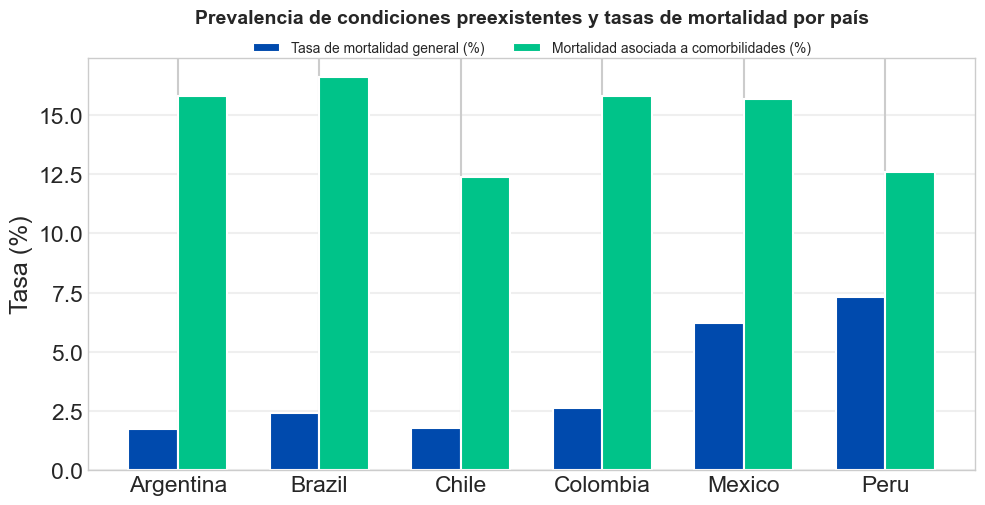

In [88]:
#Gráfico comparativo.
x = np.arange(len(df_comorb_final[col_country]))
width = 0.35

plt.figure(figsize=(10,6))


plt.bar(x - width/2, df_comorb_final["tasa_mortalidad_general"],
        width, label="Tasa de mortalidad general (%)", color="#004AAD")
plt.bar(x + width/2, df_comorb_final["comorbidity_mortality_rate"],
        width, label="Mortalidad asociada a comorbilidades (%)", color="#00C389")


plt.xticks(x, df_comorb_final[col_country])
plt.ylabel("Tasa (%)")
plt.title("Prevalencia de condiciones preexistentes y tasas de mortalidad por país",
          fontsize=14, fontweight="bold", pad=25)

#Leyenda fuera del gráfico, centrada y debajo del título
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.07),   
    ncol=2,
    frameon=False,
    fontsize=10
)

# Ajustar espacio para que no se superponga
plt.subplots_adjust(top=0.82)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()